# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, incomplete dataset

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19651231  1200  FM-12  310    5.7         N
1       19651231  1300  FM-12  320    2.1         N
2       19651231  1400  FM-12  300    3.1         N
3       19651231  1500  FM-12  300    3.1         N
4       19651231  1600  FM-12  280    1.0         N
5       19651231  1700  FM-12  280    2.6         N
6       19651231  1800  FM-12  290    3.1         N
7       19651231  1900  FM-12  280    3.6         N
8       19651231  2000  FM-12  310    4.1         N
9       19651231  2100  FM-12  290    2.1         N
10      19651231  2200  FM-12  300    3.6         N
11      19651231  2300  FM-12  290    5.1         N
12      19660101  0000  FM-12  270    6.7         N
13      19660101  0100  FM-12  270    6.2         N
14      19660101  0200  FM-12  300    6.2         N
15      19660101  0300  FM-12  290    5.7         N
16      19660101  0400  FM-12  290    4.6         N
17      19660101  0500  FM-12   10    4.6         N
18      19660101  0600  FM-12   20    6.2         N
19      19660101  0700  FM-12  360    4.1         N
20      19660101  0800  FM-12   20    2.6         N
21      19660101  0900  FM-12   40    2.6         N
22      19660101  1000  FM-12   30    3.6         N
23      19660101  1100  FM-12   40    2.6         N
24      19660101  1200  FM-12   20    2.1         N
25      19660101  1300  FM-12  999    0.0         C
26      19660101  1400  FM-12   30    1.0         N
27      19660101  1500  FM-12   40    1.5         N
28      19660101  1600  FM-12   40    2.6         N
29      19660101  1700  FM-12   50    4.1         N
...          ...   ...    ...  ...    ...       ...
318489  20160201  0900  FM-15  360    3.6         N
318490  20160201  0930  FM-15   20    3.1         N
318491  20160201  1000  FM-15   30    3.1         N
318492  20160201  1030  FM-15   40    2.6         V
318493  20160201  1100  FM-15   60    1.5         N
318494  20160201  1130  FM-15   30    2.1         V
318495  20160201  1200  FM-15   60    1.5         N
318496  20160201  1230  FM-15   90    1.5         N
318497  20160201  1300  FM-15   60    2.1         N
318498  20160201  1330  FM-15   40    1.0         N
318499  20160201  1400  FM-15   30    2.1         V
318500  20160201  1430  FM-15  350    2.1         N
318501  20160201  1500  FM-15  360    1.5         N
318502  20160201  1530  FM-15   10    1.0         N
318503  20160201  1600  FM-15  350    0.5         N
318504  20160201  1630  FM-15   20    0.5         N
318505  20160201  1700  FM-15  310    1.5         N
318506  20160201  1730  FM-15  310    2.1         N
318507  20160201  1800  FM-15  320    2.1         V
318508  20160201  1830  FM-15  360    1.0         N
318509  20160201  1900  FM-15  350    1.0         N
318510  20160201  1930  FM-15  320    2.1         V
318511  20160201  2000  FM-15  310    1.5         N
318512  20160201  2030  FM-15  320    1.5         N
318513  20160201  2100  FM-15  310    1.0         N
318514  20160201  2130  FM-15   80    1.0         N
318515  20160201  2200  FM-15  360    1.0         N
318516  20160201  2230  FM-15  230    3.1         V
318517  20160201  2300  FM-15  210    3.6         V
318518  20160201  2330  FM-15  230    3.1         N

[318519 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

-37.008 174.792


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


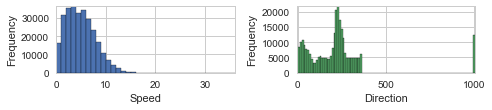

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  2.834380e+05  283438.000000  283438.000000  283438.000000   
mean   2.000554e+07    1150.934942     211.051112       4.846311   
std    1.101017e+05     701.379816     190.707209       3.012263   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.993100e+07     500.000000      90.000000       2.600000   
50%    2.002050e+07    1200.000000     200.000000       4.600000   
75%    2.010051e+07    1800.000000     240.000000       6.700000   
max    2.016020e+07    2345.000000     999.000000      36.000000   

               month   dir_windrose  
count  283438.000000  283438.000000  
mean        6.554421     213.097012  
std         3.459030     193.653018  
min         1.000000       0.000000  
25%         4.000000      90.000000  
50%         7.000000     220.000000  
75%        10.000000     250.000000  
max        12.000000     999.000000

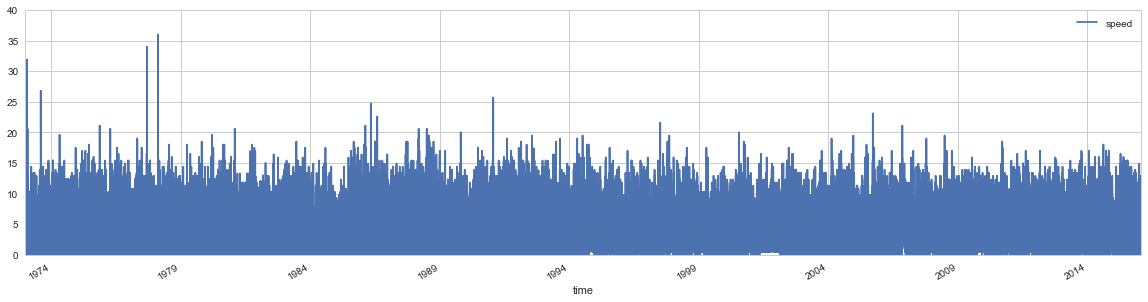

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

True


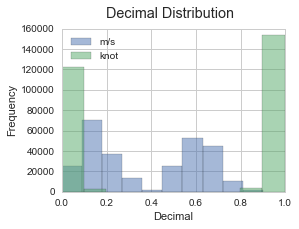

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

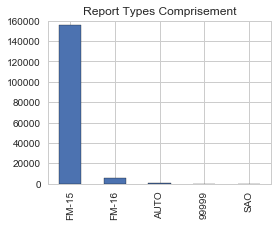

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

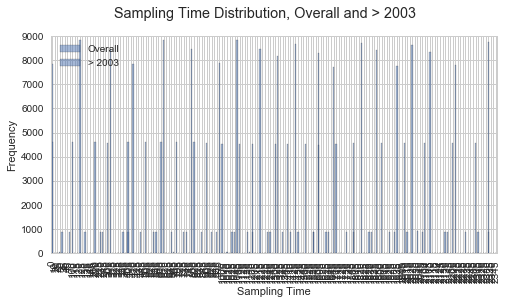

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0, 30]


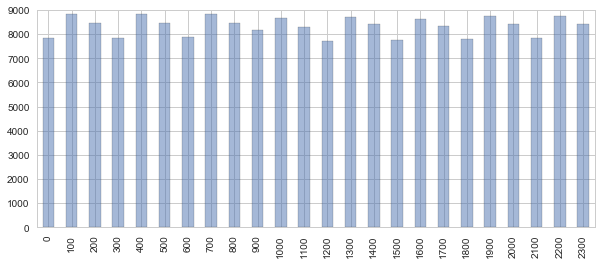

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-02-17 22:00:00  19930217  2200  FM-15  299      1         N      2   
1993-03-15 16:00:00  19930315  1600  FM-15  179     12         N      3   
1993-04-01 20:00:00  19930401  2000  FM-15  335      7         N      4   
1993-10-18 22:00:00  19931018  2200  FM-15   74     16         N     10   
1995-10-22 22:00:00  19951022  2200  FM-15  209     14         N     10   
1995-11-21 18:00:00  19951121  1800  FM-15  335      5         N     11   
1995-12-23 07:00:00  19951223   700  FM-15   61      5         N     12   
1995-12-23 08:00:00  19951223   800  FM-15   78      2         N     12   
1995-12-24 08:00:00  19951224   800  FM-15  178      5         N     12   
1995-12-24 09:00:00  19951224   900  FM-15  113      4         N     12   
1995-12-24 10:00:00  19951224  1000  FM-15   55      5         N     12   
1995-12-24 12:00:00  19951224  1200  FM-15  103      4         N     12   
1995-12-24 13:00:00  19951224  1300  FM-15  105      4         N     12   
1995-12-24 15:00:00  19951224  1500  FM-15   94      3         N     12   
1995-12-24 16:00:00  19951224  1600  FM-15  196      1         N     12   
1995-12-24 17:00:00  19951224  1700  FM-15  143      3         N     12   
1995-12-24 19:00:00  19951224  1900  FM-15  108      3         N     12   
1995-12-24 21:00:00  19951224  2100  FM-15  211      4         N     12   
1995-12-24 23:00:00  19951224  2300  FM-15  236      5         N     12   
1995-12-25 10:00:00  19951225  1000  FM-15  138      4         N     12   
1995-12-25 11:00:00  19951225  1100  FM-15  109      3         N     12   
1995-12-25 12:00:00  19951225  1200  FM-15  111      5         N     12   
1995-12-25 20:00:00  19951225  2000  FM-15   11      2         N     12   
1995-12-27 10:00:00  19951227  1000  FM-15  133      5         N     12   
1995-12-27 12:00:00  19951227  1200  FM-15  134      4         N     12   
1995-12-27 13:00:00  19951227  1300  FM-15  129      5         N     12   
1995-12-27 14:00:00  19951227  1400  FM-15  126      5         N     12   
1995-12-27 15:00:00  19951227  1500  FM-15  101      5         N     12   
1995-12-27 16:00:00  19951227  1600  FM-15   69      5         N     12   
1995-12-27 21:00:00  19951227  2100  FM-15  129      5         N     12   
...                       ...   ...    ...  ...    ...       ...    ...   
1996-01-30 17:00:00  19960130  1700  FM-15   64      2         N      1   
1996-01-30 18:00:00  19960130  1800  FM-15   33      2         N      1   
1996-01-30 19:00:00  19960130  1900  FM-15   78      4         N      1   
1996-01-30 20:00:00  19960130  2000  FM-15   54      3         N      1   
1996-01-30 21:00:00  19960130  2100  FM-15   53      5         N      1   
1996-01-30 22:00:00  19960130  2200  FM-15   57      4         N      1   
1996-01-31 06:00:00  19960131   600  FM-15  102      4         N      1   
1996-01-31 07:00:00  19960131   700  FM-15   98      3         N      1   
1996-01-31 08:00:00  19960131   800  FM-15   65      2         N      1   
1996-01-31 10:00:00  19960131  1000  FM-15   43      3         N      1   
1996-01-31 11:00:00  19960131  1100  FM-15   21      4         N      1   
1996-01-31 12:00:00  19960131  1200  FM-15   27      3         N      1   
1996-01-31 13:00:00  19960131  1300  FM-15  354      1         N      1   
1996-01-31 14:00:00  19960131  1400  FM-15   49      2         N      1   
1996-01-31 16:00:00  19960131  1600  FM-15  298      2         N      1   
1996-01-31 17:00:00  19960131  1700  FM-15    1      1         N      1   
1996-01-31 19:00:00  19960131  1900  FM-15  318      2         N      1   
1996-01-31 20:00:00  19960131  2000  FM-15  353      5         N      1   
1996-01-31 22:00:00  19960131  2200  FM-15  121      4         N      1   
1996-04-09 12:00:00  19960409  1200  FM-15   92      8         N      4   
2004-12-07 17:00:00  20041207  1700  FM-15  335   

sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1997-07-05 01:00:00  19970705   100  FM-15   10     42         N      7   
2006-11-09 03:00:00  20061109   300  FM-15  210     41         N     11   
2006-11-09 05:00:00  20061109   500  FM-15  230     40         N     11   
2000-07-20 17:00:00  20000720  1700  FM-15   80     39         N      7   
1992-07-22 08:00:00  19920722   800  FM-15  230     38         N      7   
1994-07-06 05:00:00  19940706   500  FM-15  200     38         N      7   
1997-11-09 18:00:00  19971109  1800  FM-15  210     38         N     11   
2006-11-09 04:00:00  20061109   400  FM-15  220     38         N     11   
1992-07-22 07:00:00  19920722   700  FM-15  230     37         N      7   
1994-04-21 04:00:00  19940421   400  FM-15  180     37         N      4   

                     dir_windrose  incre  incre_reverse  
time                                                     
1997-07-05 01:00:00            80   33.0           37.0  
2006-11-09 03:00:00           240   18.0            3.0  
2006-11-09 05:00:00           220    2.0            4.0  
2000-07-20 17:00:00            10   16.0           18.0  
1992-07-22 08:00:00           220    1.0            4.0  
1994-07-06 05:00:00           250   11.0            6.0  
1997-11-09 18:00:00           240    6.0           15.0  
2006-11-09 04:00:00           230   -3.0           -2.0  
1992-07-22 07:00:00           220    3.0           -1.0  
1994-04-21 04:00:00           270    7.0            5.0

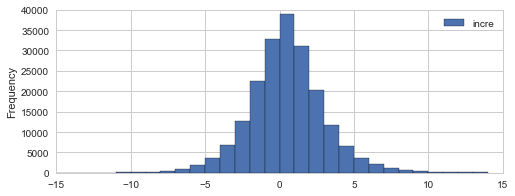

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 1


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2006-11-09 03:00:00  20061109   300  FM-15  210     41         N     11   
2006-11-09 05:00:00  20061109   500  FM-15  230     40         N     11   
2000-07-20 17:00:00  20000720  1700  FM-15   80     39         N      7   
2006-11-09 04:00:00  20061109   400  FM-15  220     38         N     11   
1997-11-09 18:00:00  19971109  1800  FM-15  210     38         N     11   
1992-07-22 08:00:00  19920722   800  FM-15  230     38         N      7   
1994-07-06 05:00:00  19940706   500  FM-15  200     38         N      7   
1991-08-06 16:00:00  19910806  1600  FM-15  150     37         N      8   
2004-02-15 09:00:00  20040215   900  FM-15  240     37         N      2   
1992-07-22 07:00:00  19920722   700  FM-15  230     37         N      7   

                     dir_windrose  incre  incre_reverse  
time                                                     
2006-11-09 03:00:00           240   18.0            3.0  
2006-11-09 05:00:00           220    2.0            4.0  
2000-07-20 17:00:00            10   16.0           18.0  
2006-11-09 04:00:00           230   -3.0           -2.0  
1997-11-09 18:00:00           240    6.0           15.0  
1992-07-22 08:00:00           220    1.0            4.0  
1994-07-06 05:00:00           250   11.0            6.0  
1991-08-06 16:00:00           300   23.0           16.0  
2004-02-15 09:00:00           210    2.0            5.0  
1992-07-22 07:00:00           220    3.0           -1.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       2389
10      3266
20      4461
30      5568
40      5600
50      6726
60      7695
70      7040
80      5881
90      4226
100     3442
110     3435
120     3256
130     3329
140     3593
150     3311
160     3342
170     3329
180     4359
190     7924
200    10250
210    12135
220    15599
230    14662
240     9114
250     5671
260     3785
270     3197
280     3353
290     3418
300     3441
310     3663
320     4121
330     3733
340     3082
350     2400
999     6076
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0138969186955


0     3411
3     1146
2      940
1      495
4       38
5       37
6        3
8        3
7        2
11       1
Name: speed, dtype: int64


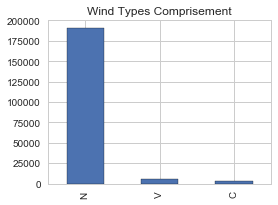

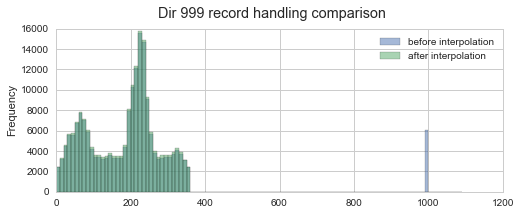

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

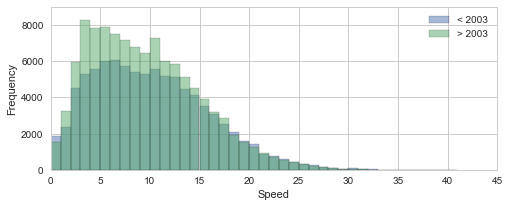

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

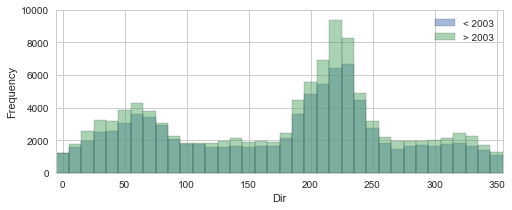

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

1990 - 1994


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


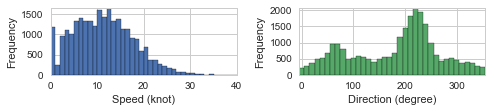

1995 - 1999


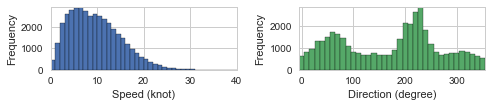

2000 - 2004


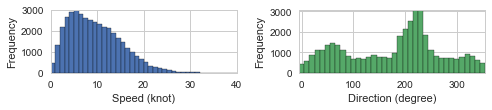

2005 - 2009


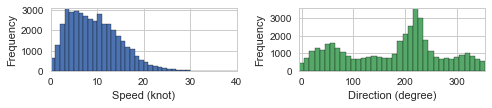

2010 - 2014


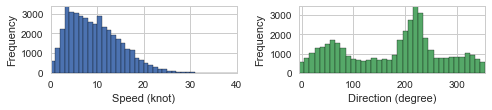

2015 - 2016


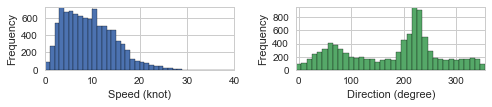

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 18.0)

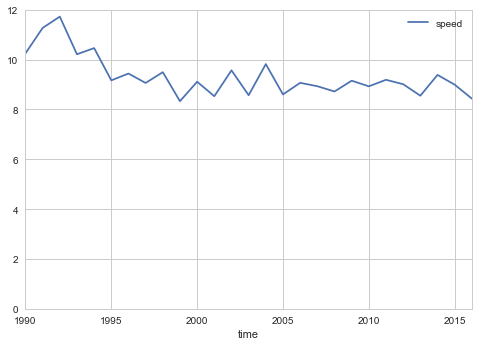

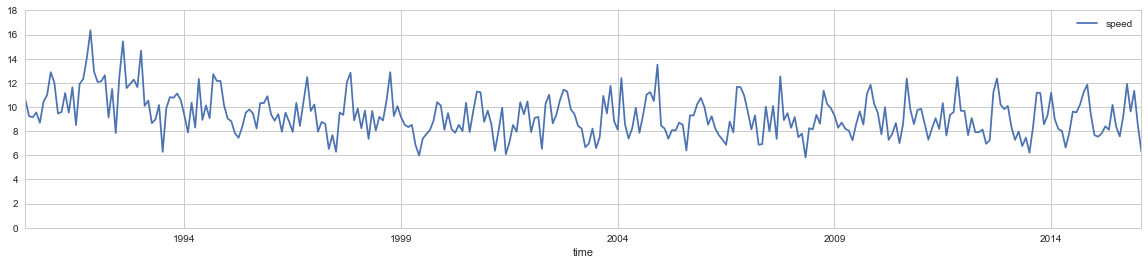

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANsAAAB6CAYAAAA2wyYLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE5ZJREFUeJztnWtwlOXZx3+72WQ32ZxIwkFLCQmCSngZq4zBqcURSnFs
QQWpUEZmTHCgZ6ZDJ0BBgskYbLUf6iBjO/YLOGMdROf17ViqiIVySAWJlADtqCEhCYFkj9lDsrvZ
5/0QdtnNabNhD88m1+8Lu8/9PPdeu/DnPl33/9YoiqIgCELc0SY7AEGYKIjYBCFBiNgEIUGI2AQh
QYjYBCFBiNgEIUGI2FIMRVHYsGEDBw4cCF6zWq1s2bKF8vJyHn74Yf7whz/g9/tHXT5S3ULsELGl
EH19fVRXV3P8+PGw6z//+c+5fPky+/btY+/evXz00Ue88soroy4fqW4hhihCStDS0qKsWbNGefTR
R5UFCxYo+/fvVxRFUS5cuKDMmTNHaWxsDN577tw5paysTHE6nRHLR6pbiC3SsqUI586do7S0lEOH
DpGTkxO83tLSgsFgYO7cucFr99xzD16vlwsXLkQsH6luIbbokh2AMDpWrFjBihUrBl2fPHkyPT09
mM1mCgoKAGhrawPAbDZHLB+pbiG2SMuW4syfP5/i4mJ27dqFzWbDYrGwZ88edDodXq83YrmQOERs
KU5GRgavvfYaX3/9NeXl5SxevJiFCxeSl5dHdnZ2xHIhcUg3chxw991389e//hWTyUR2djZ9fX38
9re/5Zvf/OaoyoXEIC1bimOz2fjRj35EW1sbhYWF6PV6jh49yuTJk5k1a1bEciFxiNhSnLy8PHp7
e6mrq+PKlSscP36cF198kZ/97GdoNJqI5ULiUHU38uzZs8kOQZX09vbS0tIS/H02bNjAm2++yYoV
K8jNzeXJJ59k9uzZoy4fqW5hZB544IHR35zshb6ROHPmTLJDUBRFHXGoIQZFUUccaohBUaKPQ7qR
gpAgRGyCkCBEbIKQIERsgpAgIs5G+v1+qqur+c9//kNGRga1tbUUFxcHyz/55BP27t2LTqdj1apV
/PCHP+TQoUO89957QP/s1qVLlzhx4gStra1s3LiRmTNnArB27Voef/zx+HwzQVAZEcX28ccf4/F4
+Mtf/kJDQwN79uxh3759AHi9Xurq6jh48CCZmZmsXbuWxYsXs3LlSlauXAnA7t27WbVqFbm5uTQ2
NvLcc89RUVER328lCCokYjfy7NmzfOc73wHgvvvuC27LAPjqq6+YMWMGeXl5ZGRk8MADD/DZZ58F
y//973/z5Zdf8swzzwBw4cIFPv30U9atW8f27dtxOByx/j4xx+/3Y7VaMZlMmEymsB3Ofr8/eH1g
mSAMJGLL5nA4whJW09LS8Pl86HQ6HA5H2P4no9EYJqA33niDn/70p8H38+fPZ/Xq1cybNy+4a7iq
qmrEz0/24qrVauVoyynqLV/g6nbx6IyHyM/PDyvLyskaVBYPkv1bBFBDHGqIIVoiii07Oxun0xl8
7/f70el0Q5Y5nc6g+Ox2O01NTSxcuDBYvnTpUnJzc4Ova2pqIgYY1Qp9HDCZTNRbvuCue+bQbbVz
3733UVhYGCy7or9OTn7uoLJYc/bs2aT/FmqJQw0xBOKIhojdyPvvv59jx44B0NDQwJw5c4Jls2bN
orm5GavVisfj4cyZM3zrW98C4LPPPuOhhx4Kq6uyspLz588DcOrUKcrKyqIKVhBSmYgt29KlSzlx
4gRr1qxBURReeuklPvjgA1wuF8888wxbt26lsrISRVFYtWoVU6dOBaCpqYnp06eH1VVdXU1NTQ3p
6ekUFRWNqmUThPFCRLFptVpefPHFsGuhWzMWL17M4sWLBz23YcOGQdfKysp4++23xxLnmFAUBZfL
FXYtKytLst2FpKDqrP/bxeVy8c/PmzAYsgDo6XHx8P0lGI3GJEcmTERSXmyRWi+DIYvMrKzgvaET
OtLKCYkk5cU2sPVyu53cf89UjEYjTqcTJeSsx54eN6fPW8nLmyStnJBwUl5sEN56ud0uTp+/Sl7e
JKyWLgxZ2WSFCEpvyAzeKwiJRPViM5lMwdeTJk1Cq42cOx0QlNs9vKhG26VUFAWvz4fX48Hr8Ya1
lIIQDaoX2/uXDgPgtDtYV74qZovGo+1Sulwuuqw9ZHU6sZttg8aHgjBaVC+2nPzcuNU92i5lmk6H
Lj2dNJ3qfy5Bxch+NkFIEPJfNYPHbyDLAkLsEbERPn6D8OUDGaMJsULEdpPQ8Vvo8kFL81X8fX1J
jk4YD8iYbRgC4tPrM5MdijBOkJYtChT6lwIC4zun0wlDrLv5/X4sFkvYtdGuEQrjFxFbFPT5fJy5
2Mb17gwArne04dK7MRgzwxa8LRYLb9W/izG3f4d7rNcIhdRExBYFit+Pp9eDx9MDQLfdTpvfRo+i
H7TgbczNjusaoZB6iNjo7/Y5u+1ob870221WcvIGe4m4nW4avP+i3dAKQPuNFrILcmXBWxgVcfGN
BHjqqaeCRkHTp0+nrq6O5uZmtm7dikajYfbs2ezatWtM45jQbTUDM/vHgqPbzr+u/5N8T383z9LV
xULtIxQWFg2615CdhTGv32fFYLyVfaLcHKcZjUbMZrPkUAqDiItvZE5ODoqisH///rC66urq2Lx5
M+Xl5bzwwgscOXKEpUuXRh106LaaoTL7x0JmtjEoop4ed9TPu50u/u/yx0zrvoMbrR3kFuYBebcV
kzC+iItv5OXLl3G73VRUVLB+/XoaGhoAaGxs5MEHHwRg0aJFnDx5csyBB7bV6A3q2S6TlWMkJz+X
rBzZIycMJi6+kQaDgcrKSlavXs2VK1d4/vnn+dvf/oaiKMEUKKPRSHd3d8QAr7W3A/0zeg29DeTn
5+N2u/mqzY3BkInNakarTcNkMgOEvR9tWVvrFWw6K+jS+u+zWWmxNOP1+WlrvQI6MJvN2O02dPp0
9Ob++kLf2+x20tN60eq0dN64gTZdh0/pGxT77aAWr0Q1xKGGGKIlLr6RJSUlFBcXo9FoKCkpIT8/
n87OzrDxmdPpDHpIjsQdd94JQHfWLV9Gp9NJn/46mVlZmE1daLRaJk0qAAh7P7Csq/MGTqeD/Px8
dFrIycunsLAInRbsTgsFBf33KV4fM3KLKZ5Zik4LV9ubKCgowGm2odPrgveFvu+xO8jLz6KoqAiv
04sh28CUO6YOin2sqMkrMdlxqCGGQBzREBffyIMHD7Jnzx4Arl+/jsPhYPLkycydO5f6+noAjh07
xoIFC6IK9nZxdNupv3aM+hsnqO84jqPbHrO6+3x9dJi6ae90cq3TjtfrjVndwvggLr6RTz/9NNu2
bWPt2rVoNBpeeukldDodVVVV7Ny5k9///veUlpaybNmyRHzHMAITISNNgih+P912GzarmW67bdQz
i7q0wL63tFiFK4wj4uIbmZGRwauvvjqorpKSEg4cODDWWGPKIEFpbwkqdD2t/UYL/ttcQvP7/Zhv
jvMCh28EutSSxjVxmLArsQMFlV0QPn4MrKcZjFm4em9vm42r28l7nR9SOLWIG60dpKXrKJxaJGlc
E4wJKzYIF1QsUQCvt98kCMDr8ZGV278s4LB1o8vQSSrXBGRCiy1eBCZLNIb+mdqOTjvT9TKOm+iI
2OJEYLIEkAkTARCxqYqB++Bk8mR8Ma7FNjCbf+Cso9oI3Qcnkyfjj3EttoHZ/EPNOiaC0AkTr8dH
WsbwP7vsgxu/jGuxQXg2f6xnHUdL6ISJTJZMXFJyQOD3+7FZLdisZuw2a3ChWM1IdomQki2bxWLh
ROtRcvLzRtzoKQhqIiXFBpB5c0F6LBs91UJoGhcgO7zHOSkrtgChOY4wvH+IGglN4wKG3eHt9/ux
Wq1jOj5LUA8

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOQAAAB6CAYAAACvO/++AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFN5JREFUeJztnX9sU+e5xz+xHSeO84PwG0ZDSwSFws0Ko4WrdSDYWKde
INtIA0lJJEomumnt6LaKsgmKmnTANLXSEEVjdP8EJsgKZeplbUcBiZaWtiRQSiDlLkACAZo4cWzH
ThzHPvcPJ07sJHYgjn2cPB8pgvf88nNsf33e857n+b5xiqIoCIKgCjTRDkAQhG5EkIKgIkSQgqAi
RJCCoCJEkIKgIkSQgqAiRJDDBEVRKCoqYv/+/b5lzc3N/Pa3v2XBggU88cQT/PnPf8bj8Qx4fbBj
C0ODCHIY4Ha72bZtGx999JHf8ueff56qqir27NnD7t27OX78OH/6058GvD7YsYUhQhFimtraWmXN
mjXKkiVLlPnz5yulpaWKoijKpUuXlBkzZiiVlZW+bc+fP6/Mnj1bsdvtIdcHO7YwdMgVMsY5f/48
06ZN48iRI6SkpPiW19bWkpiYyCOPPOJbNnPmTFwuF5cuXQq5PtixhaFDF+0AhMGxcuVKVq5c2Wv5
uHHjaGtro6mpidGjRwNQV1cHQFNTU8j1wY4tDB1yhRymZGVlMXXqVF555RUsFgtms5kdO3ag0+lw
uVwh1wvRQQQ5TNHr9ezatYtr166xYMECli5dysKFC0lLSyM5OTnkeiE6SJd1GPPwww9z7NgxGhsb
SU5Oxu1288c//pEHHnhgQOuFyCNXyGGKxWIhPz+furo6xowZQ0JCAqdOnWLcuHFkZmaGXC9EBxHk
MCUtLQ2n08n27du5ceMGH330Ea+++iq//OUviYuLC7leiA4x2WUtLy+PdgiqxOl0Ultb63t/ioqK
eOutt1i5ciWpqan8+Mc/Zvr06QNeH+zYQv985zvfue994xQl9hwDysvLB3XSkULiDC+xEOdgY5Qu
qyCoCBGkIKgIEaQgqAgRpCCoiJgcZRWih8fjwWw291qenp6ORiO/74NFBCncE2azmQOfHcaY2p1e
Z7e28MyCVYwZMyaKkQ0PRJDCPWNMTSZlVGq0wxiWSB9DEFSECFIQVIQIUhBUhAhSEFSEDOoIQVEU
BYfD4Wvb7XaIvfTnmEEEKQTF4XDwccV1EhOTAKj/5jaupI4oRzV8CSlIj8fDtm3b+Prrr9Hr9ZSU
lDB16lTf+pMnT7J79250Oh2rVq0iNze3331efPFFTCYT4DVU+va3v80bb7xBSUkJFRUVGI1GAN58
801xOVMRiYlJGJK8gkxIMEQ5muFNSEF++OGHtLe3c+jQIS5cuMCOHTvYs2cPAC6Xi+3bt/P2229j
MBjIy8tj6dKlVFRU9LnPG2+8AXir2QsLC9m8eTMAlZWV7Nu3z+d+JggjlZCCLC8v53vf+x4Ajz76
qM+zE6C6upqMjAzS0tIAb2HmF198wYULF/rdB2DXrl2sXbuW8ePH4/F4qKmpYevWrZhMJnJycsjJ
yQkZeKwUysZ6nHa7nS+vNpCQkAhAo6me1jG3aWmzd29jbeF823nS09OjFudwIaQgW1pa/FzItFot
HR0d6HQ6Wlpa/LqWRqORlpaWoPs0Njby6aef+q6ODoeDtWvXsm7dOtxuN4WFhcyZM4eZM2cGjUvt
haoQGwW1EDzO2tpajlV/Tkqy90f3tqmWxI4kUrXdn3uH0sGMGTPIyMiIWpxqYbA/GCEfeyQnJ3tH
1jrxeDzodLo+19ntdlJSUoLu8/7777N8+XK0Wi0ABoOBwsJCDAYDycnJLFy4kKqqqkGdlBBeDMlJ
GNNSMKalkGhMQqfVoYuP9/1pdTI2GC5CCnLevHmcPn0agAsXLjBjxgzfuszMTGpqamhubqa9vZ1z
584xd+7coPt8+umnLFq0yNe+ceMGeXl5uN1uXC4XFRUVzJ49O2wnKAw9SmcFSGNjo++vr1m0hNCE
/GlbtmwZZ86cYc2aNSiKwh/+8AfeffddHA4Hq1ev5uWXX2b9+vUoisKqVauYMGFCn/t0cf36dT/f
z8zMTLKzs8nNzSU+Pp7s7GymT58+NGcrDAmtdgf/W/UhE22TAKn+GAwhBanRaHj11Vf9lvX07Vy6
dClLly4NuU8Xx44d67WsqKiIoqKiAQUsqJOkFKNUgIQBSZ0TBBUhghQEFSGCFAQVIYIUBBUhghQE
FSFPdAU/AsutHA4HUmwVOUSQgh+B5Va1NTfxuN1RjmrkIIIUetGr3ErKHyOG3EMKgooQQQqCipAu
q+CHx+PB0mymvb0NAJvVgqKRYZ1IIYIU/DCbzZy5dYqUUZ31j/W1JI+WHNVIIYIUetFV/wiQaEyK
cjQji4iaXF2+fJkNGzbw4IMPApCXl8dTTz1FWVkZBw8eRKfT8fOf/5wlS5YM2QkL/rjdbu7evUtt
bS3gNR/ziM1j1IioyVVlZSXr1q3j2Wef9R2/oaGB0tJSDh8+jNPpJD8/n+9+97vo9fqhO2vBR11d
HUerPuYLRw0Ad2pukjZuNCC1jNEgoiZXly5d4vr165w4cYKpU6fyu9/9josXLzJ37lz0ej16vZ6M
jAyqqqrIysoK+8kKfWNMSyFtjNfxz2q2DPp4Ho+HpqYmv2Uyf+TAiKjJVVZWFk8//TRz5sxhz549
7N69m5kzZ/Z5jFDEivuY2uO8e/cugE9AVqsFXUI8CQNsA1isVuK1TjQ6r+Aa6r5h75WvSR/jdaFz
2BwsyfhvRo0aNeh41f5+DpaQggynydWyZctITfWO2C1btozi4mLmz5/f5zFCoXb3MYgNl7Ta2lqO
3/nS54lrb7KgS9ANuA3gtLYwdlwqkyZP9i5wKej0OsZNmgCArdnKo7MeHbSlRyy8n0PuOhdOk6v1
69dz8eJFwGt2NXv2bLKysigvL8fpdGKz2aiurvZ7DSG8eDwePzMqs9mMMshBHAVwuTpwtbd3/nVI
Qvp9ElGTq23btlFcXEx8fDxjx46luLiY5ORkCgoKyM/PR1EUXnzxRRISEob8xEcqgVOS112/icvV
Pqhjujvc3G20EZfo7encbbAyJUE76FhHIhE1uZo9ezYHDx7stTw3N5fc3NwBBy0Mjp5TkiclJ4PN
EWKP0HR5tQJodSLG+0WGvQRBRYggBUFFSOrcCENRFFztLlzt3vvGDrcryhEJPRFB9kGgjQVAUlIS
cXFxUYoofDgcDuq+sZDq8naO7tZb8bjF9l8tiCD7INDGoq3NwRPzHvJNKBvraHXdAzAaXTzIVVI1
iCD7oaeNhSBEChFkHwQW6TocDmy23uIcLt1YQT2IIOl9z1hXV8fHt06S2pl7aTaZsNke54EHHvJt
43C0MPuhUX7dWEmgFgaLCJK+rQ8TDIm+It22tlYSEgx+XVhLs5l/nH+XUZ0J1Gqcgs3TOW9jT7yp
clEKSAiJCLKTYNaHiseDzWrB0txd4WC1NpM0St1TsAWmyYE3Va6d+ChGJQRDBDkAWu2tXHB9zu3E
W75l9bdv85BhQhSjGhg90+TAmyrX2uKMaAxSHzlwRJADJLGHzwxAgtngq3AAcLW7Bl01MVzoWf0B
YGm0cKThPcZOGAuos3uvFkaEIAMHbbqE0zVCarfb71lMgRUO1iZLr2SCkUqf1R9T0lXdvVcLI0KQ
gYM2zWYTcRotaWnpvnZiUjJJ9/jg37/CYUS8lQNGqj/uj4i6zl25coXi4mK0Wi16vZ6dO3cyduxY
SkpKqKio8D1CePPNNwfkGnAv9By0aW1NIk6j8WsLghqIqOvca6+9xpYtW5g1axYHDx7kr3/9K5s3
b6ayspJ9+/b52UIIoenrsYYMlsQ2EXWde/311xk/fjzg9QNNSEjA4/FQU1PD1q1bMZlM5OTkkJOT
EzLwe/EuaW1

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFUJJREFUeJzt3X1MU2ffB/BvAUEtKA9zJubxZeA0gRHm1DnNEPXJNt0y
52Ymky64xZcpKk6dCvIiGnDaOImbDh3OZbkLyBo1m3u2xc3N+YpuYYJBcMQ+hg1QbwRuR9G20J7n
D0MHaxGu0p629PtJSOS09HeuUL+cc3qu66eQJEkCERH1mp+7d4CIyNswOImIBDE4iYgEMTiJiAQx
OImIBDE4iYgE9So4y8vLkZiY2GXb119/jTfeeMP6vVarxfz58xEfH49Tp04BAAwGA5KTk6FSqbBs
2TI0NTUBAMrKyrBgwQIsXLgQ+/btc9ZYiIhk0WNwHjx4EBkZGTAajdZtlZWVOHLkCDpuAW1oaIBG
o0FxcTEOHTqE3NxcmEwmHD58GOPHj0dRURFeffVV5OXlAQCysrKwe/duHD58GOXl5aisrHTR8IiI
nK/H4Bw9ejT27t1r/b65uRm5ublIS0uzbrty5QqeeuopBAYGIiQkBKNHj8a1a9dQWlqK6dOnAwDi
4uJQUlICvV4Pk8mE0aNHQ6FQIDY2FhcuXHDB0IiIXCOgpyfMnj0btbW1AACz2Yz09HRs3rwZQUFB
1ufo9XqEhIRYv1cqldDr9V22K5VKtLS0QK/XIzg4uMtz//zzzx53tLS0tPejIiISMGnSJKHn9xic
nV29ehU1NTXYunUrjEYjrl+/ju3bt2Pq1KlobW21Pq+1tRUhISEIDg62bm9tbcWQIUO6bOu8vTdE
B+cM1dXVSNxchMFDh9s8du/uv6HZocL48eNdVr+0tNQt42Zt1val2qKEgjMmJgbffPMNAKC2thbr
169Heno6GhoasGfPHhiNRphMJuh0OowfPx4TJ07E6dOnERMTgzNnzmDSpEkIDg7GgAED8Mcff2DU
qFE4d+4cVq9eLbzjcho8dDiC/+u/3b0bROQhhIKzO48++igSExOhUqkgSRLWrVuHoKAgJCQkICUl
BQkJCRgwYAB2794NANi2bRs2bNgAs9mM2NhYPPnkk87YDSIiWfQqOEeOHAmtVvvQbfHx8YiPj+/y
nEGDBuGjjz6yeb0JEybYvJ5czGYzdDqd3cfGjh0Lf3//Xr+WZLHgxo0bTnktIvIeTjni9CY6nc7u
NUtHrlfeb2nAlvw7GDy0axDLce2TiNzH54ITsH/Nsrujx+6OKB/2WkTUv/lkcNrT3dFjY20VHhkZ
6aa9IiJPxODsxN7R4727t920N0TkqbjIBxGRIAYnEZEgBicRkSBe43QBZ93faTabUVNT02UdAEdf
i4ich8HpAs66v1On00FdeAWDh96yeYz3ihK5D4PTRZx1fyfvEyXyPLzGSUQkiMFJRCSIwUlEJIjB
SUQkiMFJRCSoV5+ql5eX44MPPoBGo0FVVRWys7Ph7++PwMBAqNVqDBs2DFqtFsXFxQgICEBSUhJm
zZoFg8GAjRs3orGxEUqlEmq1GmFhYSgrK8P27dvh7++P2NhYj18B3lm4fidR/9BjcB48eBDHjx/H
oEGDAADbt29HZmYmIiMjUVxcjIMHD2Lp0qXQaDQ4evQojEYjVCoVnn32WWt74OTkZHzzzTfIy8tD
RkYGsrKysHfvXowaNQrvvPMOKisrERUV5fLBuhvX7yTqH4TbA+fm5iIy8sEya2azGUFBQWwPLKDj
vszOX/YawRGR5xJqDwwAw4c/+E/+22+/oaCgAIWFhTh79qzL2wMDzmkRXFNT0+fXcIWKigq0tLR0
2dbTvtr7GWdzZ1tm1mZtT+XQzKFvv/0W+/fvR35+PsLCwuy2/PXU9sAhISHA/9pOYXS36Ohom1P1
nvbV3s84k7tbtrI2a8tVW5Twp+pfffUVCgoKoNFoMGrUKAAP2gaXlpbCaDSipaXFpj0wALvtgSVJ
wrlz5zB58mThHe9POj40qq6u7vLVU9sOInIPoSNOs9mM7du3Y8SIEUhOTgYAPP3001izZg3bA/cB
23YQeRfh9sC//PKL3ed4S3tgT8W2HUTegzfAExEJYnASEQlicBIRCWJwEhEJ4grwXorz3onch8Hp
pTjvnch9GJxezN4tTDwSJXI9Bmc/wyNRItdjcPZD7IxJ5Fr8VJ2ISBCDk4hIEIOTiEhQv73GaTab
odPpbLZzqTYi6qt+G5w6nQ6Jm4ts2lJwqTYi6qt+G5wAl2ojItfgNU4iIkG9Cs7y8nIkJiYCeNBA
LCEhASqVCllZWbBYLAAArVaL+fPnIz4+HqdOnQIAGAwGJCcnQ6VSYdmyZWhqagIAlJWVYcGCBVi4
cCH27dvninEREblMj8F58OBBZGRkwGg0AgB27NiBtWvXoqioCJIk4ccff0RDQwM0Gg2Ki4tx6NAh
5ObmwmQyWfuqFxUV4dVXX0VeXh4AICsrC7t378bhw4dRXl6OyspK146SiMiJerzG2dFXfdOmTQCA
q1evYsqUKQAe9Eo/f/48/Pz8rH3VAwMDu/RVX7p0qfW5eXl5XfqqA7D2VY+KiupxZ0W60XlqG2B3
cqSdsK+2i2Vt36otSrivuiRJUCgUALr2Spejr7pI+1BPbQPsTqLthN3dspW1WVuu2qKEPxzy8/v7
Rx7WK90VfdWJiDyBcHBGRUXh0qVLAB70Sp88eTL7qhORTxG+jzMlJQWZmZnIzc1FREQEZs+eDX9/
f/ZVJyKfIdxXPTw8HAUFBTbPYV91z8YFjomcp1/PHKK/cYFjIudhcPoQLnBM5ByccklEJIjBSUQk
iMFJRCSIwUlEJIjBSUQkiMFJRCSIwUlEJIj3cfq4h80oMpvNMu8NkXdgcPq4h80oSnkzxrr2KhH9
jcFJnFFEJIjXOImIBDE4iYgEMTiJiAQ5dI2zra0NqampqKurg5+fH7KzsxEQEIDU1FQoFAqMGzcO
WVlZ8PPzg1arRXFxMQICApCUlIRZs2bBYDBg48aNaGxshFKphFqtRlhYmLPHRkTkEg4dcZ4+fRrt
7e0oLi7GqlWrsGfPHqe0DSYi8gYOBWd4eDjMZjMsFgv0ej0CAgJs2gZfuHABV65csbYNDgkJ6dI2
ePr06dbnlpSUOG9EREQu5tCp+uDBg1FXV4cXX3wRzc3NOHDgAH799dc+tQ3uDfZVl5+v9tlmbd+q
Lcqh4Pz8888RGxuL9957Dzdv3sRbb72FtrY26+OOtA3uDfZVl5+v9tlmbd+qLcqhU/UhQ4ZYjxiH
Dh2K9vb2PrcNJiLyFg4dcb799ttIS0uDSqVCW1sb1q1bh+jo6D63DSYi8gYOBadSqcSHH35os72v
bYOJiLwB56qTXZLFgvr6elRXV9t9nL3YyZcxOMmu+y0N0JxS4OhvJ20eYy928nUMTuoWV00iso9z
1YmIBDE4iYgEMTiJiAQxOImIBDE4iYgEMTiJiAQxOImIBDE4iYgEMTiJiAQxOImIBDE4iYgEca46
CZMsFty4ccPuY1w1iXyBw8H5ySef4KeffkJbWxsSEhIwZcoUtgf2EfdbGrAl/w4GD9V12c5Vk8hX
OHSqfunSJVy+fBmHDx+GRqPBrVu32B7Yx3SsnNT5a/DQ4e7eLSJZOBSc586dw/jx47Fq1SqsWLEC
M2fOZHtgIvIZDp2qNzc3o76+HgcOHEBtbS2SkpIgSRLbAxMqKip6/fvsia+2qmVtz+dQcIaGhiIi
IgKBgYGIiIhAUFAQbt36uxUv2wP7rujoaKdc43R3u1jW9q3aohw6VZ80aRLOnj0LSZJw+/Zt3L9/
H9OmTWN7YCLyCQ4dcc6aNQu//vorXn/9dUiShC1btmDkyJFuaQ9sNpuh0+lstnd3uwwRUV85fDvS
pk2bbLa5oz2

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFh5JREFUeJzt3X9MlPcdB/D3AULl+GHZZmKKtKI1qSM3W53tUrWzWUu3
aHVGnWBwndooW3V0VU/54Y+As6STubZzFqttdoKUqNnW2qWdzsmslBmsGlBreiHXAU4EWeUQ747j
uz8Mt+Idd9z3fjzPc/d+JSZwz+l97jl4ez+e7/PWCSEEiIjIbzFKD0BEpFUMUCIiSQxQIiJJDFAi
IkkMUCIiSQxQIiJJIwrQCxcuIC8vDwDQ1dWF/Px8LFu2DEuXLsWXX34JAKitrcXChQuxZMkSnDx5
EgBw584drF27Frm5uXjxxRdx8+ZNAMD58+exePFiLF26FG+++WYo7hcRUegJHyorK8XcuXPF4sWL
hRBCGI1GcezYMSGEEPX19eLkyZOio6NDzJ07V9hsNnHr1i3X1wcOHBCvv/66EEKIDz74QJSWlgoh
hHj++eeFxWIRAwMDYtWqVaK5udnXGEREquPzGWhGRgbeeOMN1/fnzp3D9evX8cILL+D999/HjBkz
cPHiRTz66KOIj49HcnIyMjIycOXKFTQ2NmLWrFkAgNmzZ6O+vh5WqxV2ux0ZGRnQ6XSYOXMmzpw5
E7r/IYiIQiTO1xWys7PR2trq+r6trQ0pKSl499138eabb2Lfvn146KGHkJyc7LqOXq+H1WqF1Wp1
Xa7X69HT0wOr1YqkpKQh1/33v//tc9DGxka/7hgR0UhNmzZN6u/5DNB7jRkzBk8//TQA4Omnn8Zv
f/tbZGVlobe313Wd3t5eJCcnIykpyXV5b28vUlJShlz29ctHQvZOBltjYyNn8UDrszidTpjN5mG3
T5w4EbGxsWGZJVTUMota5gACe3Lmd4BOmzYNp06dwoIFC3D27FlMmjQJBoMBu3fvhs1mg91uh9ls
xuTJk/HYY4/h1KlTMBgMqKurw7Rp05CUlIRRo0bhyy+/xPjx43H69Gm89NJL0neAKFjMZjPyNlcj
MXWs27bbX3XAtDMXkydPVmAyUiu/A9RoNKK4uBg1NTVISkrCrl27kJqairy8POTm5kIIgZdffhkJ
CQnIycmB0WhETk4ORo0ahV27dgEAtm/fjvXr18PpdGLmzJn4zne+E/Q7RiQjMXUsku5/QOkxSCNG
FKDp6emora0FADzwwAN455133K6zZMkSLFmyZMhlo0ePxuuvv+523alTp7r+PSIireKB9EREkhig
RESSGKBERJIYoEREkhigRESS/D6MiSgaiYEBtLS0DLtd9iB70jYGKNEI9PXcwJbKTiSmuq9U4kH2
0YsBSjRCPMie7sX3QImIJDFAiYgkMUCJiCQxQImIJDFAiYgk+V0qN+j999/HT37yE9f3LJUjomjj
M0D37duH4uJi2Gw212WXLl3C4cOHIYQAANy4cQMmkwk1NTXYv38/KioqYLfbcejQIUyePBnV1dVY
sGAB9uzZAwDYunUrdu3ahUOHDuHChQu4dOlSiO4eEVHo+DwOdLBUbuPGjQCA7u5uVFRUoLCwECUl
JQAwpFQuPj5+SKncqlWrANwtlduzZ8+QUjkArlK5KVOm+BxWTb1InMUzLc9isVikb6upqQk9PT1B
myWU1DKLWuYIhF+lck6nE0VFRdi8eTMSEhJc1/l6eRwQmlI5gJ1InnAWz2RmSU5OBj74j9TtZWVl
DbsSSev7JZLnAMLYidTc3AyLxYJt27bBZrPhiy++wI4dO/DEE0+EpVSOiEhN/PoU3mAw4NixYzCZ
TKioqMCkSZNQVFQEg8GAxsZG2Gw29PT0uJXKAfBYKieEwOnTpzF9+vSQ3DkiolAKylr4b33rWyyV
I6Ko43ep3HCXsVSOiKIND6QnIpLEACUiksQAJSKSxAAlIpLEACUiksQAJSKSxAAlIpLEACUiksQA
JSKSxAAlIpLEXniKKk6nE2az2eO2lpaWME9DWscApahiNpuRt7kaialj3bZ1tV7GN9IfUWAq0iq/
O5EuX76M3Nxc5OXlYeXKlejs7ATATiTSjsTUsUi6/wG3P6OT05QejTTG706kHTt2oKSkBCaTCc88
8wz27dvHTiQiikp+dyJVVFRg7Ni7L3+cTicSEhLYiaQwzuKZp1kC6T3yhp1I/lPLHIHwqxMJgCs8
z507h4MHD6Kqqgr//Oc/2YmkEM7i2XCzBNJ75A07kbQ5BxDGTqRBH374If7whz+gsrISaWlpHnuO
2IlERJHO7+NA//znP+PgwYMwmUwYP348ALATiYiikl/PQJ1OJ3bs2IFx48Zh7dq1AIDvfve7WLdu
HTuRiCjq+N2J9K9//cvjddiJRETRhks5iYgkMUCJiCQxQImIJDFAiYgkMUCJiCQxQImIJDFAiYgk
MUCJiCQxQImIJPGM9BRxnE4nLBbLkDOEDWJtBwUTA5QijtlsRnnVRSSmup+2jrUdFEwMUIpIg7Ud
97r91XUFpqFI5XcnksViQU5ODnJzc7F161YMDAwAYCcSEUUfvzuRdu7ciYKCAlRXV0MIgRMnTrAT
iYiiks8AHexEGtTc3IwZM2YAuNtzdObMmSGdSMnJyUM6kWbNmuW6bn19/ZBOJJ1O5+pEIiLSGr87
kYQQ0Ol0AIb2HIWjE0lNJVScxTM1zBKq4jhvWCrnP7XMEQi/P0SKifn/k1ZvPUeh6ERSUwkVZ3Gn
lllCVRznDUvltDkHEFiQ+30g/ZQpU9DQ0ADgbs/R9OnT2YlERFHJ72egRqMRJSUlqKioQGZmJrKz
sxEbG8tOJCKKOn53Ik2YMAEHDx50uw47kYgo2nAtPBGRJK5EIgqQGBjwusbe6XSGcRoKJwYoUYD6
em5gS2UnElPNbttuf9UB4zKD69hpiiwMUKIgGG7tPUU2vgdKRCSJAUpEJIkBSkQkiQFKRCSJAUpE
JIkBSkQkiQFKRCSJAUpEJIkBSkQkSWolksPhwKZNm9DW1oaYmBiUlpYiLi4OmzZtgk6nw8MPP4yt
W7ciJiYGtbW1qKmpQVxcHPLz8zFnzhzcuXMHGzZsQFdXF/R6PcrLy5GWlhbs+0YRzOl0wmx2XzoJ
sPudwkcqQE+dOoX+/n7U1NTgk08+we7du+FwOFBQUIDHH38cW7ZswYkTJzB16lSYTCYcOXIENpsN
ubm5ePLJJ11lc2vXrsWxY8ewZ88eFBcXB/u+UQQzm83I21yNxNSxbtvY/U7hIhWgEyZMgNPpxMDA
AKxWK+Li4nD+/PkhZXOffPIJYmJiXGVz8fHxQ8rmVq1a5bruYFunL2rqUOEsnoVrFovFoqnu92h8
jHxRyxyBkArQxMREtLW14Yc//CG6u7uxd+9enD17NqCyuZFQU4eKp1m8vawEgIkTJyI2NjYssygh
nLMo0XsUiGh8jLQwBxBYkEsF6LvvvouZM2filVdewbVr1/DTn/4UDofDtV2mbC4SeHtZefurDph2
5g5bPEZE2iP1KXxKSorrGWRqair6+/sDLpuLFIMvK+/94ylUiUjbpJ6BvvDCCygsLERubi4cDgde
fvllZGVlBVw2R0SkJVIBqtfr8bvf/c7t8kDL5oiItIQH0hMRSWKAEhFJYidSmPhqbgzFIU5EFFoM
0DDx1dzIQ5yItIcBGkZsbiSKLAxQPzmdTlgsliErrAbxJBZE0YUB6iez2YzyqotITHVfRsiTWBBF
FwaoBC2dxIKIQoeHMRERSWKAEhFJYoASEUligBIRSZL+EOmtt97C3//+dzgcDuTk5GDGjBnsRCKi
qCIVoA0NDfjss89w6NAh9PX14cCBA9i5cyc7kSRxmSeRNkkF6OnTpzF58mT84he/gNVqxcaNG1Fb
WxvyTqRIxWW

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

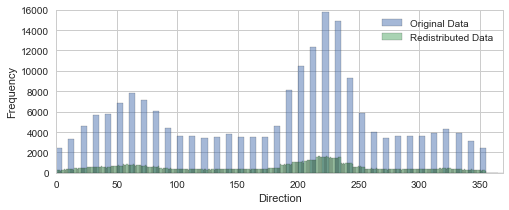

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


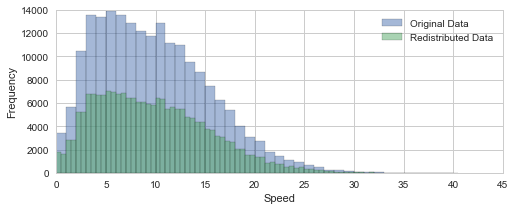

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-15
Sampling time used: [0, 30]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.256600e+04  42566.000000  42566.000000  42566.000000  42566.000000   
mean   2.012083e+07   1148.663252    175.633416      9.517345      6.515764   
std    1.418510e+04    692.687026     94.975356      5.544131      3.438893   
min    2.010010e+07      0.000000     -4.998478      0.002430      1.000000   
25%    2.011041e+07    500.000000     81.497221      5.029730      4.000000   
50%    2.012071e+07   1100.000000    200.719836      8.780874      7.000000   
75%    2.013101e+07   1800.000000    237.023048     13.112676     10.000000   
max    2.014123e+07   2300.000000    354.985523     35.509866     12.000000   

       dir_windrose             x             y  
count  42566.000000  42566.000000  42566.000000  
mean     184.772424     -2.545946     -1.171296  
std      137.537815      8.047583      6.978669  
min        0.000000    -34.498575    -30.149111  
25%       80.000000     -8.338503     -6.124993  
50%      210.000000     -1.563672     -1.886586  
75%      250.000000      2.805102      3.725199  
max      999.000000     28.940436     24.026234

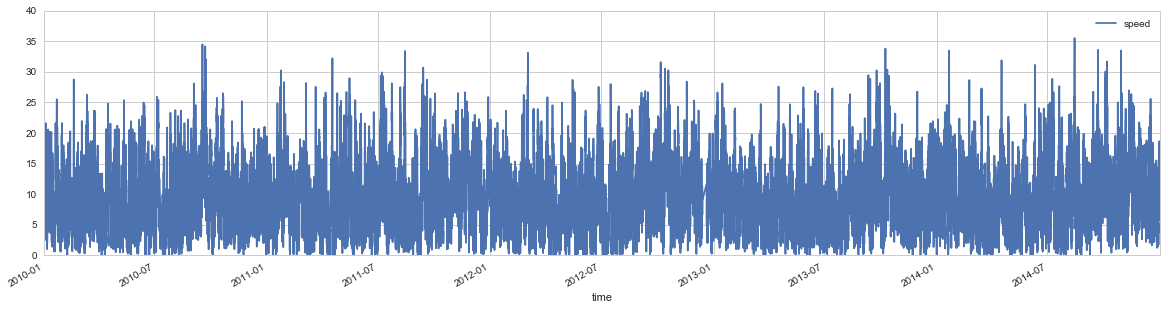

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

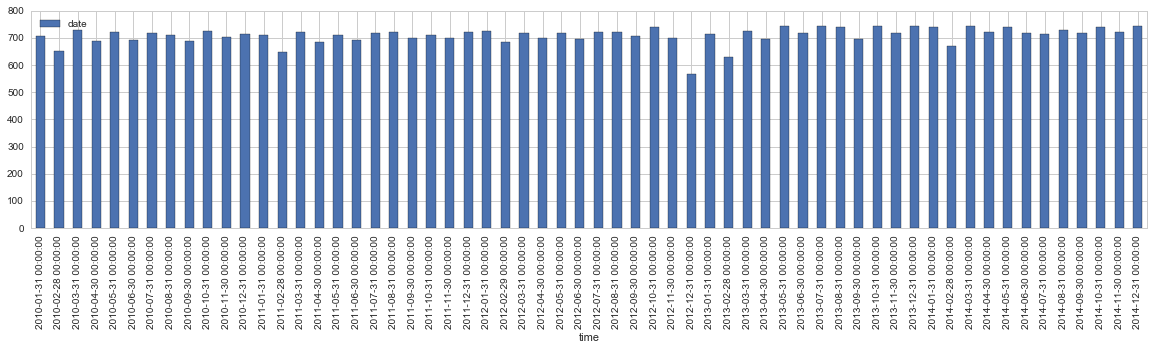

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


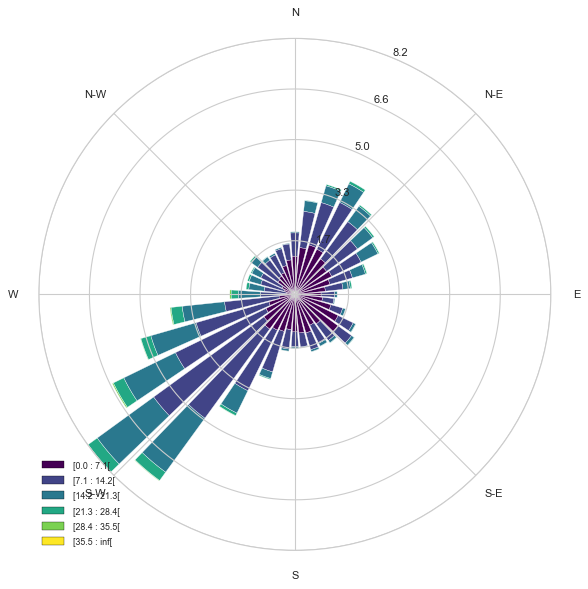

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdYVGfax/HvDDB0FFCwgiIiltgVu1FjFI0loIIa1I0p
G33XWGKNGhON4sYUY6yrrhuMii1ZWFtMNGo0KqDExIKiRIMUqStVysz7B8sEAiIMzJwpz+e6uJSZ
c+bcj+XmlOf8jkylUqkQBEHQMrnUBQiCYBpEsxEEQSdEsxEEQSdEsxEEQSdEsxEEQSdEsxEEQSfM
tfXBSqWSFStWEBMTg0KhYNWqVbi7u6vfP3XqFBs3bsTc3Bx/f38mTJhAYWEhixYt4uHDh8jlclau
XEmrVq20VaIgCDqktT2b7777joKCAkJDQ5k3bx7BwcHq9woLC1mzZg07d+4kJCSE0NBQUlNTOXPm
DEVFRezbt4+ZM2fy2Wefaas8QRB0TGt7NlFRUfTv3x+Azp078+uvv6rfu3v3Lm5ubtSrVw+Abt26
ERERgZeXF8XFxSiVSrKzszE311p5giDomNb+N2dnZ2NnZ6f+3szMjKKiIszNzcnOzsbe3l79nq2t
LdnZ2djY2PDw4UN8fX3JyMhgy5Ytz9xOVFSUVuoXBOHZunXrVu1ltdZs7OzsyMnJUX+vVCrVeyp/
fi8nJwd7e3t27dpFv379mDdvHomJiUydOpXw8HAsLS2r3FZNBvxnaWlp/CssEls7hz/qyX7M1NHd
cXZ21vhz60pUVFStxqfPjHlsYBrjqwmtnbPp2rUrZ8+eBSA6OhovLy/1e61ateL+/ftkZmZSUFBA
ZGQkXbp0wcHBQb3HU69ePYqKiiguLtZWiWq2dg7YOziqv8o2HkEQ6obW9myGDh3K+fPnCQwMRKVS
sXr1asLDw8nNzSUgIIBFixYxffp0VCoV/v7+uLq6Mm3aNJYsWcKkSZMoLCxkzpw52NjYaKtEQRB0
SGvNRi6X88EHH5R7rexl7MGDBzN48OBy79va2rJ+/XptlSQIgoTEpD5BEHRCNBtBEHRCNBtBEHRC
NBtBEHRCNBtBEHRCNBtB0DNTp07l2rVrABQUFNCtWze2b9+ufj8oKIibN29WWO/s2bOEhoYSHx/P
hAkTqr29vn37qj/37t27taz+6cTNR1qWkZFBbGws3bp1Qy4Xvd3QzJ8/nwMHDmi0bkFBAQqFosLr
48eP56OPPnrqen379iUyMpKOHTsSFRVFv379OHPmDK+99hpPnjzh4cOHeHt7V1hvwIABAMTHx2tU
r7aJf/11qKCggIiICDZu3MiUKVNo06YNTk5O9OzZkzfeeAPxIAuhOvr06UNkZCQAZ86cYfz48WRl
ZZGVlcXVq1fp2bMnERERTJw4kVdeeYXFixdTWFjI4cOHWbduHQDp6en89a9/Zfz48WzcuBGARYsW
qWf1nz17lkWLFul0XGLPphJKpZL09PRK33N0dEQul6NSqbh79y6XL1/m0qVLXLp0iatXr1JQUKBe
1sHBgRdeeIGEhAR27NhBkyZNKkx0FPTbRx99VOVeSFU0vTeqXbt23Lt3D5VKRUREBHPnzqV3795c
uHCBmJgY+vXrx7Jly9izZw/Ozs589tlnfP311+VSEnJzc/noo4+wsbFh8uTJDBkyRKMx1CXRbCqR
m5PFgZOpODd0Kfd62Rs0X331VXbt2qV+z9zcnE6dOuHj40PPnj3x8fHBy8sLuVxOcnIyffr0YeXK
lTRt2pQ333xTxyMSDIlcLsfb25uzZ8/SsGFDFAoFAwYM4IcffuDWrVtMnjyZZcuWMXv2bADy8/Pp
06dPuXA6b29v9X2Gzz33HHFxceW2IcVetmg2T2FjZ4+9g2Ol70VFRbFr1y68vb1588038fHxoUuX
LlhZWVW6vKurK8ePH6dv377MmDEDV1dXxo4dq83yBQPXt29ftm7dysiRI4GSZINNmzYBJXvXjRo1
YtOmTdjb2/P9999jY2NDYmKiev27d++Sk5ODpaUl165dIyAggJ9++omUlBQAbty4ofMxiXM2NVB6
eLV06VIAVq9eTVBQED4+Pk9tNKVat27NkSNHsLKyYuLEiZw/f14XJQsGqk+fPkRFRTFw4EAAFAoF
9vb29OzZE7lczrvvvssbb7xBYGAge/bsKZeqACWpCXPmzCEwMJBhw4bh6enJ+PHj2bVrF9OmTSM5
OVnnY5IZ+uN3a5sZkpaWxsFTt8vtxSQ+/A0zcwUurk3KLZv48Dfi7txkY/BcWrXpyDsfbCY3J6tG
2TfHjh1j1KhRODg48OOPP9KuXbsqlzfmTBRjHhuI8f2Z1vZslEoly5cvJyAggKCgIO7fv1/u/VOn
TuHv709AQAD79+8H4PDhwwQFBREUFMSECRN47rnnePz4sbZK1MjZbw8BMG7KLBzqOdU4+8bX15cd
O3aQkZHB8OHDefjwoTbKFAS9o7VzNmUDz6OjowkODmbz5s3AH4HnBw8exNramokTJzJ48GD8/Pzw
8/MD4P3338ff3x8HB/0Jskr4/R6/XDmPp3cnnuvaR+PPmTp1KgkJCSxZsgRfX1/Onj1L/fr167BS
QdA/ehV47uvrC8Avv/xCbGws7733XrW3panMzEySkh6TlZ2nfi3l0SPMzBQU/Skk8D8H/gnAQN9A
9cm4nOz/Eh2dW+NmMXToUK5evcqBAwcYMmQIGzZseGr8qTHnLBvz2MD4x1cTehV4Xmrr1q3MnDmz
2tuq7Tmb2PTy52xkqoIK52we3Ivh9vVI3Dy8GfTiGGQyGQBZj63p3NlLo7zivXv3olQqOXToEJ99
9hn79u2rMMvYmI/7jXlsYBrjqwm9CjwHePz4MXFxcfTq1UtbpWnk6z0lh4DDxk5RN5raMjMzY/fu
3aSkpHDgwAEaNWrE+vXr6+zzhdpTKpVkZGRotG5mZiZpaWkVXi+dGGpqtNZsunbtyunTpxkxYkSV
gec2NjZERkYyffp0ACIiIujdu7e2ytLI77/d5vKPJ2jWojVtO/Ys9151ZhtXxcrKim+++Yb+/fuz
YcMG3NzceOedd+qsdqF2MjIyKjx9o7qSkh4Tm3673Gv69OQOXdOrwHOAuLg4mjVrpq2yNFK6V/Pi
6MkV9jqqM9v4WRwdHTl+/Dg9e/bk3XffJSAggObNm6NUKiv96WiqPxmlUvr0jZrKys7TaD2AS5cu
MXv2bDw9PVGpVBQVFTFlyhRGjBhR6fIJCQncunWrQq63PtGrwHOA1157TVslaST+fiyXz52gZev2
FfZqSlU127i6mjVrxurVq/nLX/7CypUr2bZtGxkZGZyMSCA2/Y8nTJjyT0ZT06tXLz799FOg5FRD
UFAQLVu2pG3bthWWvXjxIvfu3TPNZmMsvtmzGZVKxcuTZmj9XMorr7xCcHAwO3fuZMGCBTg6OmJt
a1frRiYYPltbWwICAjh69Ci7d+8mKSmJR48eMXjwYGbNmsW2bdvIz8+nS5cu2Nvb88UXX6BSqcjJ
yeHjjz+mZcuWUg9B3K5QlYcP7nLx7DFatGpL116DarRu6bmctLS0cl9KpfKp65ibm/PBBx9QXFxc
7cv+gulwdnbmxo0bdO7cmR07dnDw4EH27duHmZkZb7zxBi+99BJDhgzhzp07fPTRR4SEhPDiiy9y
/PhxqUsHxJ5Nlb7Zu6Vkr2ZyzfdqKjuXU51DoHHjxtGpUyf27t3LW2+9pXHtgvFJSEigS5cu/PLL
L1y8eBE7O7tykSalXF1d+fDDD7GxsSE5OZmuXbtKUG1Fotk8xaPE3/npzFHcPLzp1luzLBBNzuXI
5XI+/PBDXnrpJdasWUPP4fp1DssU5WRrdstMTvZ/yXpsXSeflZ2dzYEDBxg3bhx5eXl88MEH3L9/
n/3796NSqZD

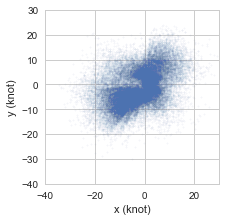

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEk5JREFUeJzt3XtUzPn/B/DnNClpiqwVZ512kTgu1bhE27otKzZtucUK
e7bdyDl71DqcQoM0liz2WEcUwmYtfa3snmPdD/keTi0VFusyLhFSqZjRdJmZ1++PfuZraqr5MJop
r8c5zvF5957P5zWjp8973p/PvEdERATGmMlsLF0AY80Nh4YxgTg0jAnEoWFMIA4NYwJxaBgTqEWF
prq6GitWrMDgwYMxePBgrFmzBlqt1mz9AUClUiEwMBBlZWX19lm6dCl69uxp8GfFihX19r916xZC
Q0Ph5eWFgIAAnDlzpvEn24hvvvmmTg3bt2+vt/+FCxcwYcIEeHp6YtKkSfjnn3/0Pzt27BgWLVok
6Pg6nQ7JyckYPXo0pFIppk6diuzsbIM+v/76K/z9/SGVShEREYEHDx4Y3dfNmzfRt29fZGVlCarh
raEWZPXq1fTZZ59Rbm4unT17lvz8/GjTpk1m609EFB8fT1u2bGmwz7Rp0ygxMZEKCwv1f5RKpdG+
arWahg0bRjKZjBQKBW3atIn69etH9+7da/wJN2Do0KGUnp5uUEN5ebnRvgUFBSSVSmnDhg2kUCho
+fLlNHjwYHr27Jm+z6RJkygrK8vk4+/YsYN8fHzo+PHjdPfuXUpISCBvb2/Kz88nIqL9+/dTnz59
aM+ePXT79m2Sy+U0cuTIOjVqNBqaOHEieXh4UGZm5mu8EubXYkJTUVFBXl5edOLECX3bgQMHyNfX
l7Ra7Rv3JyIqLCwkb29vKisra7AWHx8fysjIMKnu9PR08vX1paqqKn3bjBkzaPXq1SY93hilUkke
Hh6kUChM6r9x40YKDg7Wb+t0Oho1ahSlpqYa1DljxgyTaxg/fjwlJSUZtI0ZM4Z27Nih/3l8fLzB
MceOHUtpaWkGj9m8eTOFhoZaVWhazPDs33//hVqtho+Pj75t4MCBePr0Ke7fv//G/QFg3759kEql
aNu2bb11FBUVoaysDF27djWp7pycHEilUrRq1UrfNmjQIOTm5pr0eGMUCgVsbW3h5uZmUv/c3FwM
GjRIvy0SiTBgwACDGkaOHInc3FzcuHHDpH3KZDJ88cUXddqVSiUA4MGDB+jfv7/BMXv27ImcnBx9
261bt7Br1y7ExcWZdMym0mJC8+TJEzg4OMDJyUnf9v777wMACgoK3rg/AJw+fRpDhw5tsA6FQgGR
SIStW7di+PDh+Pzzz5GSkgKdTme0f2FhITp27GjQ1qFDBzx58qTB4zRWg0QiQUxMDD755BMEBQUh
PT293v6m1NC2bVv069cPGRkZJtXg4+ODTp066bdPnz6Ne/fuwdfXV7//2q/zo0ePUFJSAgDQarWI
iYlBZGSkwX6sQYsJjVqthr29vUGbnZ0dAKCqquqN+2u1Wly7dg3u7u4N1nHnzh3Y2NjAzc0NycnJ
CAsLw6ZNm7Bt2zZBdRurwVS3b99GRUUFfH19sW3bNgQHB0Mmk+HQoUNvVIO7uzuuXLkiuB6FQoHo
6GiMHz8eAwcOBAAEBgZi+/btuHz5MjQaDdLS0nD16lVUV1cDALZt2waJRIKpU6cKPt7bZmvpAsyl
devWdf6RX247ODi8cf+ysjJotVq4uLjo27799luDGaFDhw5h+vTpCAgIQLt27QAAPXv2xLNnz7Bz
507Mnj3b5Dpat25t9HkGBATg0aNH+m1jw7gFCxYgIiJCP4zs1asXHjx4gNTUVAQEBLx2De3atcOd
O3eM1lWfK1euIDw8HD169MDKlSv17RERESgoKMC0adMAAB9//DGCg4OhVCqhUCiQkpKC/fv3QyQS
CTpeU2gxoenUqRPKy8uhUqkgkUgA1Ly/AABXV9c37v/yH+/VYdbKlStRUVGh3+7YsSNEIpE+MC+5
u7ujuLgYWq0WYrHY4Geurq76475UVFRktAYASE5OhkajMfqzl8RicZ33Xd27d8fp06eN9je1Bq1W
Cxsb0wcn58+fx5w5c+Dl5YXExESDENrb22PVqlVYunQp1Go12rdvj8jISHTp0gVHjhyBUqms854o
PDwcwcHBDU7fN4UWE5pevXrBwcEB2dnZGD58OICaaw8dOnQw+oZYaH8XFxfY2tqitLRU32bsF3vl
ypVQKBTYsWOHvu3KlSv46KOP6gQGAKRSKdatWweNRgNbW1t9HVKp1Ojz/OCDDxp6GQAA3333Hdq2
bWvwP/vVq1fRrVs3o/2lUqlBoIgIOTk5CAsLM+hXWlqqf9/XmOvXr2P27Nnw8fHBxo0b9UPfl9au
XYvOnTsjNDQUDg4OUKvVyMzMxNq1a9GvXz8EBgbq+6rVagQFBUEul8PPz8+k479Vlp6+M6f4+Hj6
9NNP6cKFC3Tu3Dny8/MzuKZSWlpKpaWlJvevbfLkyXWmUWvLzMykXr16UVJSEuXl5VF6ejp5e3vT
H3/8QUQ11x0KCwtJrVYTEZFKpSI/Pz+KiYkhhUJBiYmJ5OnpSffv33/t1yE9PZ169+5N+/fvp7y8
PNq5cyf16dOHzp8/T0RElZWVVFhYSJWVlURE9PjxY/Ly8qJ169aRQqGguLg4GjJkCD1//txgvxMm
TKCUlBQiqrm+VFhYSBqNxmgNwcHBNGbMGMrPzzd6vWr37t3k6+tLWVlZpFAoKDw8nKZOnUo6na7O
vlQqlVVNOYuILPchtNpXiN9UVVUVdu3ahczMTLRq1QrDhg3DtGnT9EOK+Ph4ADXToab0r+3AgQO4
desWoqOjG6zj77//xoEDB/D48WO4uLggMDAQo0aNAlAz7ImMjMScOXP0Z7h79+4hJSUFeXl5cHV1
xYwZM+Dp6flGr8WJEydw+PBhFBcXw9XVFVOmTNFPK1+7dg1yuRyxsbHo3bs3gJqz4S+//IInT57A
zc0NX3/9tcGZqby8HHPmzMGaNWvQuXNnZGRkICkpCRs2bKhz9ikoKMD8+fON1hUQEIDQ0FDodDqk
paUhIyMD1dXV8Pb2xldffWUwm/lSRUUFwsLCDOptCgMGDDD+A0sm9sKFC5Y8vGAFBQXk5eVFRUVF
za72V71O7Xv37qVZs2YZtIWHh1NRUZG5yjJZU7z2DR2jxUw5NwVXV1dMmDAB+/bts3QpTYqI8Ntv
v2Hu3Ln6tpycHNjY2KBDhw4WrMwyODQCzZ8/H3/99RdUKpWlS2kyR44cgYeHB4YMGaJv8/T0xObN
my1YleW0mNmzpuLk5IRDhw6Z/f2YNRs3bhzGjRtn0PZypu9dxGcaxgTi0DAmEIeGMYEaHZhqtVrE
xsbi7t27EIlEiIuLg729PWJiYiASidCjRw8sW7YMNjY2SEtLw969e2Fra4u5c+di5MiRTfEcGGtS
jYbm1KlTAIC9e/ciKysLP/30E4gIUVFRGDx4MJYuXYqTJ0/C29sbqamp+P3331FZWYnp06fDz8+v
zu0TjDV3jYZm9OjRGDFiBICazzs4Ozvj3Llz+g9vDRs2DGfPnoWNjQ2kUins7OxgZ2cHNzc3XL9+
/Y2vbDNmbUyaN7S1tUV0dDSOHz+On3/+GWfPntXf9evo6AilUgmVSmVwC4Sjo6NJ1zKa89Qt1245
lqzf5Mn2hIQELFiwACEhIaisrNS3v3jxAs7OzpBIJHjx4oVBu7H7iGqr9/4eK5ednc21W0hT1N9Q
KBudPTt48CCSkpIA1Hw4SyQSGSync+bMGQwcOBCenp7Izs5GZWUllEolbt++DQ8PDzM9BcasR6Nn
mjFjxmDRokUIDQ2FRqPB4sWL0b17d8hkMqxfvx7dunWDv78/xGIxZs6cienTp4OI8P3339f5CC1j
LUGjoWnTpg0

Wall time: 8.41 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        title = 'Month: %s' % (month)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsvXl8W+WV///WvluWZMv7Fq+xs5CEJiSELQTCHgqlMAX6
bUuH0hYo0JbSKZCytNChw1L4tdMVph1m2BkIhUAgLCEQIAlkcRw73lfJli3J2tf7+8NIxMRJnPix
44A/r5deia/ufe6VdD/3nOc853yOTJIkiRnMYAbHBORH+wJmMIMZjB8zhJ3BDI4hzBB2BjM4hjBD
2BnM4BjCDGFnMINjCDOEncEMjiHMEPZLgJmVuy8OZgg7BVixYgXV1dXce++9Y77f09NDdXU11dXV
DA0NCT3366+/zpo1a9J/P/zwwyxYsEDoOfx+P6eddhrr1q0TOu4M9scMYacIMpmM9evXj/neq6++
Omnn/a//+i+cTuekje/3+/nBD35Ab2/vpJ1jBp9hhrBThAULFtDd3c3u3bv3e2/dunVUV1cfhaua
GD788EMuueQS9uzZc7Qv5UuDGcJOEWbPnk1RUdF+1rS3t5edO3dy1lln7XfM+vXrufjiiznuuOM4
5ZRTePDBB4nH4+n3V6xYwZ///GfWrFnD4sWLWbhwIT/72c/w+/0AXHnllXz44Ye89dZbVFdX093d
nT725ZdfZtWqVcydO5eLLrqIbdu2pd/r7u6murqahx9++KCf6Yc//CFVVVX85S9/OaLvZAaHjxnC
TiHOPPPM/dziV199lfnz55Obmztq+5NPPsm1117LvHnzeOSRR7jiiiv429/+xi233DJqvz/+8Y8M
Dw9z//33c8MNN/DPf/6TP/zhDwCsWbOG2tpaFi5cyJNPPondbgcgFArxwAMPcP311/PQQw8RCoW4
7rrr0g8Du93Ok08+ySWXXHLQz/P444/z0EMPYbVaJ/S9zGD8UB7tC/gy4ayzzuKvf/0rLS0tlJeX
AyPu8Nlnnz1qv0QiwYMPPsi5556bDhgtX74ck8nEmjVr+O53v0tNTQ0Aubm53H///chkMpYvX87b
b7/NX/7yFxYvXswpp5yC0WhEr9dz00038fe//x0YiRrfd999HHfccQDE43Guu+46mpubqampQa1W
p987GKqqqoR9NzMYH2Ys7BRi7ty55OXl8dprrwHQ19fHjh07WLVq1aj9WltbGRoa2s9NPvfccwHY
smXLqDFlMln67+zsbGDEuvp8vjGvQ6FQMG/evPTfBQUFAAfcfwbTBzOEnULIZLJRbvGrr77KvHnz
yMvLG7Wf1+sFwGazjdpuMplQq9XpOSqATqfb7xwKhYLly5dzzz33jHkdGo0Gufyznz71/2QyeYSf
bAZThRnCTjHOPPNM6uvr6e7u5tVXX93PHQbIzMwEYHBwcNT24eFhotFo+v2D4ZZbbuH999/H4/GI
ufAZTAvMEHaKsXDhQrKzs3niiSfYvn37fu4wQFlZGRaLZb9EhJdffjk9xqFgNBq56667aG9vHxVZ
nsGxjZmg0xRDLpdzxhln8Nhjj6XntJ+HQqHg2muv5a677sJsNnP66afT2NjIww8/zFlnnTXuYM/y
5cvJzs7m448/RqfTEYlExnVcNBpl9+7d5Obm7he9nsHRxYyFPQo488wzicViY669pnDFFVfwq1/9
ig8++IBrrrmGxx9/nG9/+9v89re/Paxz3XnnnYRCIVwuF83NzeM6pr+/n0svvZSnn376sM41g8mH
bEbT6YuF7u5uvvnNb7Jhw4b0tnfffZerrrqKN954g8LCwqN4dTOYKGYIO4MZHEOYcYlnMINjCDOE
ncEMjiHMEHYGMziGMEPYLwCSySSxWIxoNEo0GiUSiRAOhwmHw0QiEaLRKLFYjHg8Pm3UJ/x+P+ef
f/6oCiIYSfh47rnnxjymt7eXK6+8kgsuuIBLLrmEhoaGqbjUaYWZddhpDEmS0kSMxWLp1+dJeLgp
hQqFApVKhUqlQq1Wo1ar03+rVCo0Gg1K5eTdGh9//DG33347bW1t6W1Op5M1a9bw/vvvs3jx4jGP
u/feeznvvPO49NJLeeedd7jjjjt44oknJu06pyNmCDtNIEkS0WiUYDBIIBAgEAgQDAZJJpPI5fL0
S6lUolQq0el0mM1mNBpNmnQpksnlchKJBJ988gnHHXccMpkMSZKIx+NpC5wifeqcKeInk0kkSUKl
UqHX69PVPnq9XhiJn3rqKdasWcPNN9+c3vbCCy9w+umnHzTt8sEHH0z/v7u7m4yMDCHXcyxhhrBH
CfF4HJ/Ptx85lUolKpUKnU6HzWbDbDajUqkmdK5Ucr9CoUCj0WAymQ64ryRJhEIhvF4vgUAAl8tF
LBYjmUyOIrHBYMBoNI6qFBovxipKuPrqqwHYunXrIT/HmWeeSW9vb7ru98uEGcJOISKRCB6PB7fb
TSAQSLumer2e7OxszGYzCoXiqF6jTCZLW9R9EY1GcbvdDA8PMzAwQG9vLzKZDLPZTGZm5pRe+2uv
vUZ9fT1XXXUV69atG1cxxBcFM4SdREiSRDAYxO124/F4iEQiqFQqjEYjBQUFB7V00w1qtZqcnBxy
cnKAkUDX0NAQg4ODdHZ2kkgkMBgMWK3WtKsuGq+//jrLly9Hq9VSV1dHQUEBXV1dM4SdwZFDkqS0
K+nxeEgmk2g0GjIzM8nJyZmweztdIJfLycrKIisrC4BAIEB/fz8Oh4Ouri40Gg0Wi4Xs7GzUarWQ
cz799NM4nU4uv/xympqaGBwcTCt3fFkwQ1hBSCQSuN1unE4nkUgEjUZDbm4udrt9VLH4FxUGg4Gy
sjJgxPV3Op0MDg7icDgwm83Y7XZMJtNhz3n/93//l/7+fn70ox+xZs0a/u3f/o2nnnoKjUbD/fff
v5/r/kXHTC7xBBEOh+nv78flciGXy8nMzKSgoOCoW9J9o8RHc17s9/vp6ekhEAigVCrJycnBZrNN
6rLRFxkz39oRQJIkPB4PTqeTQCCAVqulpKQEq9V6RFHTLzKMRiPV1dUkEgn6+vpwOBz09PRgtVqx
2+1fOgs5UcxY2MOAJEkMDQ3R09NDIpHAaDRSVFSEVqs92pe2H6aLhR0Lbreb3t5ewuEwRqORwsJC
DAbD0b6sYwIzFnYckCSJ4eFhurq6iMViWCwWioqKph0RjhVYLBYsFguhUIiOjg727NmTnkpMx4ff
dMIMYQ8Bv99PV1cXoVCIzMxMSkpKZogqCDqdjpqaGkKhEG1tbdTX12Oz2cjPzxcWWf6iYYawB0Ao
FKK7uxufz4fJZGLu3LlHPZD0RYVOp6O2tha/3097ezu7du3CbreTm5s7E5z6HGa+jc8hHo/T1dXF
0NAQer2e2bNn76f9O4PJgdFoZM6cOQwNDdHd3c3AwAB5eXnk5OTMBPM+xQxh94Hb7aajowO5XE5l
ZeWXMrl8OsBqtWK1Wunt7aWvr4+hoSFmzZo1M79lhrDAiFXt6OjA6/WSnZ1NQUHBlyLZYbojPz8f
u91Oc3Mzu3fvJj8//0tvbb/0hHW73bS3t6NSqWbcX4H405/+xLPPPotareacc87h+9///pj7/e53
v0Mmk3HdddeN+b5SqaSmpgaXy5WeqnyZre2X1ozE43FaWlpoa2vDbrdTV1c3Q1ZBeO+993jxxRd5
5pln+L//+z+2b9+ebgCWwvDwMD//+c/561//Oq4xs7KymDdvHgqFgt27d+NwOKaNesZUYtoQNtVE
+O233x61fcWKFaNkRGKxGAsWLGBoaCi97corr+Tiiy9O/+31elmwYAHRaHTMc7ndbnbt2kUwGGT2
7NkUFBR8IdysZDJJPB5Pv4D0/6fy5t69ezcnnXQSJpMJhULBSSedxOuvvz5qn/Xr11NWVsa3v/3t
cY+rUCiorq6

Wall time: 19 s


# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.9
Wall time: 2min 26s


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.9 1681
[  1.73385317e-05   2.37571386e-05   4.18273110e-05   5.22203745e-05
   6.80295866e-05]


In [48]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUM2d9JvpUldaWWr13f70v+sJms9hsN8cHEhwcgkMS
iBOMM8kZiLlJJrkGAiQ2Nk58Y5stYDKXbYbFgYOH2AyZA8eXZIaAPeFmAWwch2Bjgrv761VqtZbW
LtV6/1C/1W+VqkpVpVK31K7nnO983erSW6+kqke/5fn9foyiKAp8+PDh45yCPesN+PDhw0cv4ZOc
Dx8+zjV8kvPhw8e5hk9yPnz4ONfwSc6HDx/nGj7J+fDh41zDJzkfPnyca/gk58OHj3MNn+R8+PBx
ruGTnA8fPs41fJLz4cPHuYZPcj58+DjX8EnOhw8f5xo+yfnw4eNcwyc5Hz58nGv4JOfDh49zDZ/k
fPjwca7hk5wPHz7ONXyS8+HDx7mGT3I+fPg41/BJzocPH+caPsn58OHjXMMnOR8+fJxr+CTnw4eP
cw2f5Hz48HGuETjrDfg4eyiKAp7nIYoiOI5DMBgEy7JgGOast+bDR9dgFEVRznoTPs4OzWYTxWIR
w8PDEAQBALC/v4+xsTEMDw+DZVmf9HwMNHxL7hkMSZJQr9dxeHiIWCwGURQRDAahKAoURYEkSRBF
ETzPg2EYcBznk56PgYNPcs9AKIoCURQhSRIYhoEkSVhfX4ckSQgEApBlGbVaDeFwGIHAySVCSK/Z
bIJlWXAcB47jEAgEfNLz0bfw3dVnGGRZhiAIIB97KpVCPp/H0tISQqEQeJ5HOp0GwzAQBAGBQABD
Q0OIRqMYGhoCx3Ga9cg6DMOoZBcIBNqO8+HjrOBbcs8QEPdTkiQAgCiK2N3dhSzLCAaDGB4eBs/z
iEQiCAaDGBkZQSwWQ7PZRK1WQ7FYxMHBgUp6hPhoMhNFEYqioNlsIpPJYGZmBqFQyCc9H2cKn+Se
AZBlGaIoQpZlMAyDcrmMvb09jI+PI5FIYHt7W3M8wzBQFAUMwyASiSASiWB8fByKoqDRaKBer+Po
6AjpdBrBYFAlPJr0qtUqeJ5XSY+4t76l5+O04ZPcOQeJo5FkQjqdRqlUwuLiomqp2Y1YMAyjkhlN
erVaDUdHR0ilUgiFQhgaGoKiKCqpAidxQJ/0fJw2fJI7p5BlGZIkQZZlAADP89jZ2UEoFEIymVQT
Ct0kC2jSI+cklp4sy9jZ2UE4HFbjedFoFCzb0p/7pOfjtOCT3DmELMvIZrMoFotYWlpCoVBAOp3G
9PQ0xsfH24hNb8kRd9UpWJZV43WlUgmzs7Nqpjafz6PRaCAcDmvcWyvSq1QqSCQSCIfDPun5cA2f
5M4ZiHsKtIhjd3cX9Xodq6uriEQibcf3UvbBsiwikQiGhoYAtMi3Xq+jXq8jl8uh2WwiEomoll4k
EtGQXiaTQSAQgCiKvqXnwzV8kjsn0GvfBEFApVLB6OgoksmkSh5mzwV6S3hAi/RisRhisRiAE9Kr
1WrIZrMq6RFLjyQ/iGVp5t6GQiFfo+fDFD7JnQPotW/ZbBaZTAahUAjz8/OWzzUiB7fuqlPoSY9U
YJAqDFEUkU6nEYvFVEuvUyKD1N76pOeDwCe5AQex3oAWSezt7UEURVy4cAGlUsnWGv2iB+c4DvF4
HPF4HACwsbGBRCIBnueRyWQgCILG0jMiPUEQ0Gg0VNJjGAbBYNB3b5/B8EluQKF3TyuVCnZ3dzE6
OoqlpSVUq1Vb5GVm8XhBfN2uwTAMhoaGMDo6CuDE0qvVajg4OIAoiirpDQ0NIRwOt5FeKpVS1/At
vWcmfJIbQNDaNwA4ODhAoVDA/Pw8hoeH1ePckowXBNALEtFbeqIoqqSXTqchiqJGrhIOh9W9mFl6
Pumdf/gkN0BQFAW5XA7BYBCRSASCIGB3dxcMwyCZTCIYDKrH2r1pTyv+1gsEAgEMDw+rxE6T3tHR
ESRJUhMu4XBYk6CgSY/E9Ajx+aR3vuCT3ICAlGYVCgU1TrW3t4fJyUlMTk623ZTdktcgEp8R6e3v
76v/S5KkaTZAk54sy2oChya9QCCAQCDgk94Awye5AYAkSWpDSwAoFArgeR7Ly8uqBs0t6DpV+rHz
AEJQhPgEQdBYerIsq4Q3NDSkseBo0hMEAeVyGTMzMz7pDSB8kutj6JMLjUYDlUoF4XAYFy9etMwY
DrIb2isEg0EEg0EkEgkAgCAIqNVqqNfryOfzUBRFY+kR0hNFEbVaTXVvGYbxLb0Bgk9yfQq6cwgA
5PN5HBwcIBKJYGRkpKMkwi7J0TEqp88ddJCWUiMjI1AURWPp5fN5AEA0GlUbidIWL23p+aTX3/BJ
rg9Ba99kWcb+/j4ajQZWV1fVm++ZAK9kLHYIh2EYhEIhhEIhDenVajWUy2U0m01sbm4aWnqAT3r9
DJ/k+gh697RWq2FnZwfDw8NqaZYTC81JC6VeWG5erHlW5ECTXjAYRD6fx8zMDGq1GqrVKrLZLFiW
1UhWzEgPaMlfiJiZ1vP56D18kusT6LVvh4eHyGazmJubw8jIiKs1u9HJeSHkPS9QFEWtkQ2FQhgd
HVXHONZqNVQqFWQyGXAcp0lk0BacLMvIZDKIxWIYHh7WDAUilRk+egOf5M4YiqKgWq0ilUphaWkJ
kiSpbcmTySRCoZDmeKexNjs4zzE4u+6qUzAMg3A4jHA4jLGxMQ3plctllfToVvF0wwEjS48MBfJJ
z1v4JHeGIMkFMgGLtCUfGxvD9PR0V8Xz55m4Tht2iNKI9JrNJur1OkqlEg4ODtRuycBJQkPv3vI8
DwBtQ4F80nMPn+TOCLR7Sloj7e3tYWFhQS1bMoIT8nJCctlsFqVSCZFIRB1N6KMFN18W9HwMQnrb
29sIBAJtQ4HoSWiEzMjQIf3MW5/0nMO/kk8ZRn3fdnd3oSgKLl68aItcvHRXiUylXC5jenpalVBU
KhXU63WNu2XVk65f4ZW72u0aJOOaSCTUGRikVXyxWEQ6nUYoFNIkMsxIL5VKYXZ2VjMJzSc9c/gk
d4rQT80qFovY39/H+Pi4OuO0E7ysSSXZW4ZhsLS0pM5sIG5VPB43bF2u7+J73tGLuJ6ToUD0JDSG
YVCv19UqGN/S6wyf5E4JtPZNURTs7++jWq1iZWVFlSjYgRexNlLof3h4iPn5eezv7xuWdZGba2Ji
QtPF9/DwEDzPazKJRrIIPyaohRVZWg0FKhQKSKVS6lAgIkwmzwN899YKPsn1GEalWTs7O4hGo0gm
k+A4DpIkea5pMztOFEW1sSbJ3u7v73e0Vsy6+Bq1OSLuWD/gNAXFXq5DDwUiXzLE0lMUBZcuXTIc
CkSTniiKPunBJ7meQl9Yn8vlkMlkcOHCBYyNjamP90K4a3QccU8TiQQWFxdVd9PNBW/U261Wq6FW
q6FQKEAUReRyOQwPD6vVAU7hFVH2yw3dDVnSpJfP57G2toZms4lardZxKBBgTHrNZhPxePzcV2T4
JNcDKIoCSZLwxBNP4OLFiwCA/f198DyPtbU1tZkjgVMX1OnNr3dPSYG6/hhyobtxiQOBABKJBBKJ
BBRFwdbWFsLhsDqkhtyk5CYcpOxtr7R2bkA+F5r0APOhQFakd+nSJSwvL6uCZCJOpi3C84DBudIG
BPrC+mq1inQ6jUQigYWFhY5Ts+zoseyAHGfknrpd0y5IJjEej6uJDL1Qlsgn6Eyi1etwi35xmwFv
yJIWFNOwmoRGYqh0q/hIJAJFUdT33cjSI+LkQSc9n+Q8hL40ixTXm1lPBOSitUtyTm7c9fV1DA8P
a9xTI+jX9JIcjISy+kxiLzO3XhFLt/CS5DrBahJaJpMBz/NQFAWFQqFtEho5XhTFtlbxg0h6Psl5
AOKeiqKo9h8

In [49]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [50]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [51]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.386  -9.506  -6.527  5.650  4.734  -0.000
2  0.340   1.433  -1.093  3.666  4.403  -0.122
3  0.274   2.327   6.289  7.945  5.109   0.143

GMM Plot Result
0.386108508818 [[-9.50618677 -6.52721698]] [ 4.73421928  5.65006725] -90.0628380204
0.340277618475 [[ 1.43318303 -1.09278152]] [ 3.58468494  4.4696617 ] -163.301757056
0.273613872707 [[ 2.32734277  6.28903278]] [ 5.0214722   8.00110647] -81.2888888081


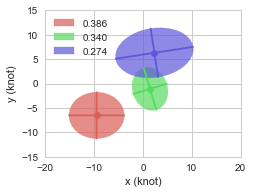

In [52]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUI1d9LvpV6S211O/u6fdrxg9sxtgEYzDOPXZiIFms
Mzdm1oBn2V7Xxw7BuYGLSQgmXDskGR5JiENWYvsEHMJadjjGxjdkceCcQIIT5/rk8vDEmAweyPRT
3Xp0S+rWW6rn/UOzq7dKVaUqqdQtNfWt5eXp7q2tLanq0+/5/RhZlmU4cODAwREFe9gHcODAgYNO
wiE5Bw4cHGk4JOfAgYMjDYfkHDhwcKThkJwDBw6ONBySc+DAwZGGQ3IOHDg40nBIzoEDB0caDsk5
cODgSMMhOQcOHBxpOCTnwIGDIw2H5Bw4cHCk4ZCcAwcOjjQcknPgwMGRhkNyDhw4ONJwSM6BAwdH
Gg7JOXDg4EjDITkHDhwcaTgk58CBgyMNh+QcOHBwpOGQnAMHDo40HJJz4MDBkYZDcg4cODjScEjO
gQMHRxoOyTlw4OBIw33YB3Bw+JBlGRzHQRAEuFwueDwesCwLhmEO+2gOHLQNRpZl+bAP4eDwUK1W
kc1mEQ6HwfM8ACAWi2FwcBDhcBgsyzqk56Cn4VhyP8MQRRHlchk7OzsIhUIQBAEejweyLEOWZYii
CEEQwHEcGIaBy+VySM9Bz8EhuZ9ByLIMQRAgiiIYhoEoilheXoYoinC73ZAkCaVSCT6fD273/iVC
SK9arYJlWbhcLrhcLrjdbof0HHQtHHf1ZwySJIHneZCPPR6PI5PJYHZ2Fl6vFxzHIZFIgGEY8DwP
t9uNYDCIQCCAYDAIl8tVtx/Zh2EYhezcbnfDOgcODguOJfczAuJ+iqIIABAEAZubm5AkCR6PB+Fw
GBzHwe/3w+PxoL+/H6FQCNVqFaVSCdlsFslkUiE9Qnw0mQmCAFmWUa1Wsb29jfHxcXi9Xof0HBwq
HJL7GYAkSRAEAZIkgWEY5PN5bG1tYWhoCJFIBBsbG3XrGYaBLMtgGAZ+vx9+vx9DQ0OQZRmVSgXl
chl7e3tIJBLweDwK4dGkVywWwXGcQnrEvXUsPQcHDYfkjjhIHI0kExKJBHK5HGZmZhRLzWzEgmEY
hcxo0iuVStjb20M8HofX60UwGIQsywqpAvtxQIf0HBw0HJI7opAkCaIoQpIkAADHcYhGo/B6vVha
WlISCu0kC2jSI89JLD1JkhCNRuHz+ZR4XiAQAMvW6s8d0nNwUHBI7ghCkiSkUilks1nMzs5id3cX
iUQCY2NjGBoaaiA2tSVH3FWrYFlWidflcjlMTEwomdpMJoNKpQKfz1fn3hqRXqFQQCQSgc/nc0jP
QctwSO6IgbinQI04Njc3US6XsbCwAL/f37C+k2UfLMvC7/cjGAwCqJFvuVxGuVxGOp1GtVqF3+9X
LD2/319Hetvb23C73RAEwbH0HLQMh+SOCNS1bzzPo1AoYGBgAEtLSwp56D0W6CzhATXSC4VCCIVC
APZJr1QqIZVKKaRHLD2S/CCWpZ576/V6nRo9B7pwSO4IQF37lkqlsL29Da/Xi6mpKcPHapFDq+6q
VahJj3RgkC4MQRCQSCQQCoUUS69ZIoP03jqk54DAIbkeB7HegBpJbG1tQRAEHDt2DLlcztQe3VIP
7nK50NfXh76+PgDAysoKIpEIOI7D9vY2eJ6vs/S0SI/neVQqFYX0GIaBx+Nx3NufYTgk16NQu6eF
QgGbm5sYGBjA7OwsisWiKfLSs3jsIL5292AYBsFgEAMDAwD2Lb1SqYRkMglBEBTSCwaD8Pl8DaQX
j8eVPRxL72cTDsn1IOjaNwBIJpPY3d3F1NQUwuGwsq5VkrGDADpBImpLTxAEhfQSiQQEQagrV/H5
fMpZ9Cw9h/SOPhyS6yHIsox0Og2PxwO/3w+e57G5uQmGYbC0tASPx6OsNXvTHlT8rRNwu90Ih8MK
sdOkt7e3B1EUlYSLz+erS1DQpEdieoT4HNI7WnBIrkdAWrN2d3eVONXW1hZGRkYwMjLScFO2S169
SHxapBeLxZT/i6JYJzZAk54kSUoChyY9t9sNt9vtkF4PwyG5HoAoioqgJQDs7u6C4zjMzc0pNWit
gu5TpX93FEAIihAfz/N1lp4kSQrhBYPBOguOJj2e55HP5zE+Pu6QXg/CIbkuhjq5UKlUUCgU4PP5
cPz4ccOMYS+7oZ2Cx+OBx+NBJBIBAPA8j1KphHK5jEwmA1mW6yw9QnqCIKBUKinuLcMwjqXXQ3BI
rktBK4cAQCaTQTKZhN/vR39/f9OSCLMkR27OXC6HbDarFOH+LBAkkZTq7++HLMt1ll4mkwEABAIB
RUiUtnhpS88hve6GQ3JdCLr2TZIkxGIxVCoVLCwsKDefXSAkGo/H0d/fj0KhgGKxCJZlwfO84sod
Rp2ZXWUsZgiHYRh4vV54vd460iuVSsjn86hWq1hdXdW09ACH9LoZDsl1EdTuaalUQjQaRTgcVlqz
rFhozdYRZRIAWFxcVNZvb28DqFk6uVwOyWQSHo+nrjzDDOnZQVKHRQ406Xk8HmQyGYyPj6NUKqFY
LCKVSoFl2br3RI/0gFr5Cylmpuv5HHQeDsl1CdS1bzs7O0ilUpicnER/f39LexqRTC6Xw9bWFkZH
R1Eul+FyuZTGfkKmg4ODGBwcrNON293dRTweV9RE1I31BEfpJpZlWemR9Xq9GBgYUMY4lkolFAoF
bG9vw+Vy1SUyaAtOkiRsb28jFAohHA7XDQUinRkOOgOH5A4ZsiyjWCwiHo9jdnYWoigqsuRLS0vw
er11663G2tSQJAnJZBK5XE7Jzm5vbxvuSevGDQ8PK7pxWo31hPS6BWbdVatgGAY+nw8+n0/5IiCk
l8/nFdKjpeJpwQEtS48MBXJIz144JHeIIMkFMgGLyJIPDg5ibGysreZ5rXXEPXW73U2zs0agdePI
6yBZStJjCkDpne1198wMUWqRXrVaRblcVlx+opYM7Cc01O4tx3EA0DAUqJffv8OGQ3KHBNo9JdJI
W1tbmJ6eVtqWtGClNIRel81mEYvFMDo6iuHh4Ya6OHIO+v9mwbJsXbuVKIpYX19XVEQEQdAtwu0F
tBJbpOdjENLb2NiA2+1uGApET0Ij7wsZOqSeeeuQnnU4JHfA0NJ929zchCzLOH78eN2cU6M9moG2
EBKJBPL5vC3Fw2ZAXK+hoSH4/X6lzozE9Eg9Gl2E2ynY5a62uwfJuEYiEWUGBpGKz2azSCQS8Hq9
DckdLdKLx+OYmJiom4TmkJ4+HJI7QKinZhHramhoSJlx2gxWelIlScLKygq8Xm9T97STdXFutxuR
SKShCJfE9IjaCB2w7yZ0Iq5nZSgQPQmNYRiUy2WlC8ax9Jqju66mIwy69k2WZcRiMRSLRczPzysl
CmZg1pXM5XKQZRmDg4Oacx3Ue6p/JrGjdqB3TnURrjpL6Xa7EQgElGE8nbT0DhJGZGk0FIjOaJP3
Ra3m7Li3+nBIrsPQas2KRqMIBAJYWlqCy+WCKIqWxgIaraXdUwAYHh42fc7DuBH0AvalUgmyLCsT
xugspZGUuxoHWVBs5z50cked0ZZlGWtra5pDgWjSEwTBIT04JNdRqBvr0+k0tre3cezYMQwODiq/
txLoN1pbrVbrxg5evHjR9J52o9U96YD97u4uZmZmIIqi5sQvvRo9u85iN9ohS5r0MpkMFhcXlS+D
ZkOBAG3Sq1ar6OvrO/IdGQ7JdQCyLEMURVy4cAHHjx8HAMRiMXAch8XFRUXMkcBqNlNrLYnvkbGD
rZyZXOjd1NyvVaNH5kCQGj3yd/UcCLtwWFauFsjnolXGozUUyIj01tbWMDc3pxQkk+Jk2iI8CnBI
zmaoG+uLxSI

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX9QFOcZx7/HHfgDUFQUENEomkQMGolFW22MpJaMExMy
avCMzjTaSbTGH9EoiFG0/DDWaKdj1UxMTavWSiSZqtNOk5TYWE01IQZFT1GIIuKJoKAHxoDH9o9z
l71j93b3bm/vFp7PjJPc7r77Pqd8ed593mefx8AwDAOCIHRDkL8NIAhCGSRagtAZJFqC0BkkWoLQ
GSRagtAZJFqC0BkmLSdraWlBVlYWqqur0dzcjAULFmDo0KHIzMyEwWDAsGHDkJ2djaAg+l1CEGJo
KtpDhw4hIiICmzZtQkNDA9LS0vD4449j6dKlGDt2LNauXYuioiJMnjxZS7MIQldo6tKee+45LFmy
BADAMAyMRiPOnTuH5ORkAMDTTz+Nr776SkuTCEJ3aOppQ0NDAQCNjY1YvHgxli5dio0bN8JgMHDn
bTab5H2+/fZbn9pJ6J+nnnpK8pqSkiLY7RGC50JCQpCYmKi2WaqgqWgBwGq1YuHChZg1axamTp2K
TZs2ceeamprQo0cPWfcpWH/EVybKxmazITw83N9mkB0upGdPknWd3R6BuIH5gueqrmapaZKqaLo8
rqurw9y5c7FixQpMnz4dAJCQkICTJ08CAI4ePYoxY8ZoaRJB6A5NRfvee+/h7t272L59O+bMmYM5
c+Zg6dKl2Lp1K9LT09HS0oLU1FQtTSII3aHp8vjtt9/G22+/3e743r17tTSDIHQNbYgShM4g0RKE
ziDREoTOINEShM4g0RKEztA8uYIg9E5rayvWrVuHsrIyhISEIDc3F4MGDeLOf/HFF9i2bRtMJhOm
TZuGl19+WXSMxWLB66+/jkceeQQAYDabMWXKFLfzk2gJQiH//ve/0dzcjIKCApSUlOCdd97Bjh07
ADjeZNuwYQMKCwvRrVs3mM1mpKSk4NSpU4Jjzp07h1dffRVz586VPT+JlujU1DdfVDzm22+/xc9/
/nMAwJNPPomzZ89y5yoqKjBw4ED07NkTgCMH+ptvvkFJSYngmLNnz+Ly5csoKirCoEGDkJWVhbCw
MLfzk2iJTk0VJgge7+VmTGNjo5OwjEYjHjx4AJPJhMbGRqf869DQUDQ2NoqOGTlyJGbMmIEnnngC
O3bswLZt25CRkeHWZgpEEYRCwsLC0NTUxH1ubW2FyWQSPNfU1ITw8HDRMZMnT8YTTzwBAJg8eTIs
Fovk/CRaglBIUlISjh49CgAoKSnBo48+yp2Lj49HZWUlGhoa0NzcjOLiYowePVp0zLx583DmzBkA
wP/+9z+MGDFCcn5aHhOEQiZPnozjx49j5syZYBgG+fn5OHz4MO7du4f09HRkZmZi3rx5YBgG06ZN
Q1RUlOAYAFi3bh1ycnIQHByMyMhI5OTkSM5PoiUIhQQFBeG3v/2t07H4+Hju/1NSUpCSkiI5BgBG
jBiB/fv3K5tf0dUEQfgd8rQEKmqanD7HR4X6yRJCDiTaTgpfqPGJcW3HS6tIxAEOibYTwoqSL1YW
oWMVpVVt50nAfodE24lwJ1Z3sNfzvTCJ13+QaDs47Za6CgUrNpb1viRe7SHRdmA89axyiE+M4zyv
noV77V6l4HF3aYz+hkTbQamoafKJWPmwwtUz9cx4f5ugGNqn7WBU1DRpIliW+MS4dktwwreQaDsQ
vlwOy52b8D0k2g6CPwXrjzk7MyTaDoS/xWO1MX6dv7NAotU5FTVNsNoYvwuW28ulZbLP8Uv0+PTp
03j33XexZ88eVFZWUid4D2EFEhMfKXmt5fYdxfdP6N1T0fUx8ZG4eaVe8TyEMjQX7c6dO3Ho0CF0
69YNALBhwwbqBK8Q1+dXm61R9Fq+WOMfj5E/xwWr01i5Ama3gfS8dxvoaO7SBg4ciK1bt3KfqRO8
MpQEnFjRxT8eo0iw/DHsOKWempbJvkNzT5uamopr165xnxmGUdwJHoDs63yNVnbwgzwx8ZHtvCv/
85X7zY7rBvZ8eM47G/vFhsF69Y5bj863o98jvWCtqMPF63cRE27wau5ARM26xyyHDx/G3r17UVBQ
IDm/3zOi+M+vSjrBB0LHcW87nyvxRkajuHe12RoRHh7GeUOj0ajYs0oRPiIcFResbpfJrB0AEP5k
GCpKq3DzXsfLT1az7jEAWCwWFBYWgmHkRd/9Llq2E/zYsWNx9OhRjBs3zt8m+Ryxd1m9gb8U9iWW
23cUP98Gcn7yJdt1weNPuxmjZt3j+vp6bNmyBVlZWVizZo0sm/0eps3IyOhUneD5z6RqCNZy+w6u
3G/26LlVKZ7cP9C3goxIFPzjDrEaxuw5uXWPm5ubsXr1aqxatQqhofJ/qfnF0w4YMAAfffQRAGDw
4MGdohO82hlLfM8aKM/3YnSEFwv4qFX3+MKFC6isrMS6devw448/ory8HHl5eVi9erXb+f2+PO4M
qCVYT7dvAoVAXiYrISkpCUeOHMGUKVPc1j3u3r07iouLMW/ePBgMhnZjRo4ciX/84x8AgGvXrmHZ
smWSggVItD6FxNpGR/K2atY99gQSrcqoGWRSItbShluK7p0Y0ccjmwh16x6z8B8ZpSDRqoQvxCpX
qA/sdpiMRgwd0k/2HKXf3wRA4tUjJFovUXv7Ro5g+V516JB+Hu0XDx3SD+Xf30Rpwy0Srs4g0XqB
1ca4TXpQiuX2HVliVeJR3cEKl9AXJFov0UKwrp7VlXJ7I0y2+07HEsP7qmIXEXiQaD2koqZJ1itx
cpAjWFexltpqnT4/Ftcm0rKqWqfzJOCOBYnWA9jCaXIS6KVw9/aMlGBZobomVwgJWA3hSuUeux3b
QbZ7AgESrULUTMdzF3QSEqyrWAHg9P0a2IPsMN6/1+4eo7pGcdeWVjnGuop36JB+KP3+pibBqI6Q
WBEIkGgVoGYqolqCBYBBPcPaRY/PW29y51nxeuN1O6qXtdTXCJ8I4GrlJFqZBJJgWTEOj3Fcc+Z+
JUwtd53ukxATC6BNvN4It+KCVfa1YgSql40yxEtfFGDIEq3NZsPVq1cRFBSEAQMGBMS7rP5AzeJp
7rZ2hCLEfA8LtAnW0lINAEjo63zeUus4jkggITgWp60PvW5cFMqqnINYACT3azuil9UrbkX75Zdf
4oMPPkB5eTmio6NhMplgtVoRHx+PuXPnYuLEiVrZ2WGQu7Ujxun7Ne0EOzg0DDVMhdN1fR4Gtm/V
9YClpRoJMbE4b23bk+V7W1/v1waql9UroqLNzMxEZGQk1q5di2HDhjmdu3TpEgoLC3H48GG8++67
PjeyMyG1tcPCCrZP5F3YHtQjsVd/2FHKnTciEZb6GvSJvOsk3NPWGs7bugpXq4AU4R2ion3zzTcR
FRUleG7YsGFYtWoVbty44TPDiDZcn2VZEvr2RQ1zF4907cEJdlh4f1yyXYcdpXisF1BW389JuAYE
O55xRZbJakJVGX2DaOUKVrA5OTntzmVkZAAAoqOjfWRWYKFl1QXXZWpieF9OXKO6Cv8SZRkW3h+9
DMeR3OMykntcxrDw/nisl+N+fSIdgSp2ac3C9+RDh/RT/LaQGPQs6ztEPe3q1atRVVWFs2fP4tKl
S9zxBw8eBHylBF+gZhCq4oJV8Lk2MaKPR6Lp0r0cgBG9DMcBAAO6D8K1e5XoZTiOJ0IdlRnL6vsh
oW9fWGq187bkZX2DqGgXLFiA6upq5OXl4Y033uCOG41Gp3cHOzpqe9mE3j1huX1HVLiAw9u6PtuW
VdW2iyDXMBVI6BWFZrsVyT0uAwB+2r0KQBXQfQKAtqbJceHXUGUDgB4YHtNPNCgFSEeSpSAv61tE
l8cDBgzA2LF

## Goodness-of-fit Statistics

In [54]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.903  0.023      0.454  7.523603e-08      0.052       0.470

# 6. GMM by Optimization

In [55]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [56]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -17.507591416887898
     jac: array([  8.57534647e-01,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,   0.00000000e+00,   0.00000000e+00,
         8.57535124e-01,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,  -2.38418579e-07,   0.00000000e+00,
         8.57535839e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 946
     nit: 47
    njev: 47
  status: 0
 success: True
       x: array([ 0.36548056,  0.80531107,  5.66563912,  9.79833807,  5.39503985,
        0.45319567,  0.47695087, -5.73237368, -6.08654606,  6.88930725,
        4.04906379,  0.46672298,  0.15756857,  1.73425429,  0.86561889,
        1.88856037,  3.46860466, -0.3239474 ])

## 6.1 GMM Result

In [57]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.477  -5.732  -6.087  6.889  4.049   0.467
2  0.365   0.805   5.666  9.798  5.395   0.453
3  0.158   1.734   0.866  1.889  3.469  -0.324

GMM Plot Result
0.476950867056 [[-5.73237368 -6.08654606]] [ 3.41474148  7.22475   ] -70.0163165894
0.365480560002 [[ 0.80531107  5.66563912]] [  4.62735263  10.18339294] -72.1950037353
0.157568572942 [[ 1.73425429  0.86561889]] [ 1.75055742  3.54025808] -166.685365663


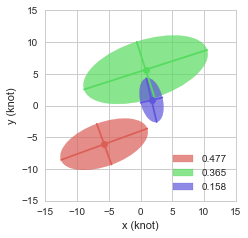

In [58]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [59]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.968  0.027     19.119  2.492009e-08      0.030       0.271

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUPGddL/ypqt632Wd+s/9m5pcQSAgkLK9eDnAMRjQG
BFEhHM8rCArXexMVlyRAhGsSCIjBKyRRohGFExPEy0UOvu/LEo5cRdYYkPwSNDPzm7XX6Z7eu2t9
/+h5ap6qrqqu6q6e6Z7U55w5M9P91PM8XV31qe/+ZRRFUeDBgwcPZxTsaW/AgwcPHvoJj+Q8ePBw
puGRnAcPHs40PJLz4MHDmYZHch48eDjT8EjOgwcPZxoeyXnw4OFMwyM5Dx48nGl4JOfBg4czDY/k
PHjwcKbhkZwHDx7ONDyS8+DBw5mGR3IePHg40/BIzoMHD2caHsl58ODhTMMjOQ8ePJxpeCTnwYOH
Mw2P5Dx48HCm4ZGcBw8ezjQ8kvPgwcOZhkdyHjx4ONPwSM6DBw9nGh7JefDg4UzDIzkPHjycaXgk
58GDhzMN32lvwMPpQ1EU8DwPURTBcRz8fj9YlgXDMKe9NQ8eegajKIpy2pvwcHpoNpsoFouIx+MQ
BAEAsL+/j7GxMcTjcbAs65Geh6GGJ8k9iyFJEur1OrLZLKLRKERRhN/vh6IoUBQFkiRBFEXwPA+G
YcBxnEd6HoYOHsk9C6EoCkRRhCRJYBgGkiRhfX0dkiTB5/NBlmXUajUEg0H4fMeXCCG9ZrMJlmXB
cRw4joPP5/NIz8PAwlNXn2WQZRmCIIB87clkEvl8HktLSwgEAuB5HqlUCgzDQBAE+Hw+RCIRhMNh
RCIRcBynmY/MwzCMSnY+n69tnAcPpwVPknuWgKifkiQBAERRxO7uLmRZht/vRzweB8/zCIVC8Pv9
GBkZQTQaRbPZRK1WQ7FYRDqdVkmPEB9NZqIoQlEUNJtNZDIZzMzMIBAIeKTn4VThkdyzALIsQxRF
yLIMhmFQLpext7eH8fFxJBIJbG9va8YzDANFUcAwDEKhEEKhEMbHx6EoChqNBur1Og4PD5FKpeD3
+1XCo0mvWq2C53mV9Ih660l6Hk4aHsmdcRA7GnEmpFIplEolLC4uqpKaXYsFwzAqmdGkV6vVcHh4
iGQyiUAggEgkAkVRVFIFju2AHul5OGl4JHdGIcsyJEmCLMsAAJ7nsbOzg0AggLW1NdWh0IuzgCY9
siaR9GRZxs7ODoLBoGrPC4fDYNlW/LlHeh5OCh7JnUHIsoxcLodisYilpSUUCgWkUilMT09jfHy8
jdj0khxRV52CZVnVXlcqlTA7O6t6avP5PBqNBoLBoEa9tSK9SqWCRCKBYDDokZ6HruGR3BkDUU+B
FnHs7u6iXq9jZWUFoVCobXw/wz5YlkUoFEIkEgHQIt96vY56vY6DgwM0m02EQiFV0guFQhrSy2Qy
8Pl8EEXRk/Q8dA2P5M4I9LFvgiCgUqlgdHQUa2trKnmYHQv0l/CAFulFo1FEo1EAx6RXq9WQy+VU
0iOSHnF+EMnSTL0NBAJejJ4HU3gkdwagj33L5XLIZDIIBAKYn5+3PNaIHLpVV51CT3okA4NkYYii
iFQqhWg0qkp6nRwZJPfWIz0PBB7JDTmI9Aa0SGJvbw+iKOLcuXMolUq25hiUeHCO4xCLxRCLxQAA
GxsbSCQS4HkemUwGgiBoJD0j0hMEAY1GQyU9hmHg9/s99fZZDI/khhR69bRSqWB3dxejo6NYWlpC
tVq1RV5mEo8bxNfrHAzDIBKJYHR0FMCxpFer1ZBOpyGKokp6kUgEwWCwjfSSyaQ6hyfpPTvhkdwQ
go59A4B0Oo1CoYD5+XnE43F1XLck4wYB9INE9JKeKIoq6aVSKYiiqAlXCQaD6l7MJD2P9M4+PJIb
IiiKgoODA/j9foRCIQiCgN3dXTAMg7W1Nfj9fnWs3Zv2pOxv/YDP50M8HleJnSa9w8NDSJKkOlyC
waDGQUGTHrHpEeLzSO9swSO5IQFJzSoUCqqdam9vD5OTk5icnGy7KXslr2EkPiPS29/fV39LkqQp
NkCTnizLqgOHJj2fzwefz+eR3hDDI7khgCRJakFLACgUCuB5HsvLy2oMWreg81Tp184CCEER4hME
QSPpybKsEl4kEtFIcDTpCYKAcrmMmZkZj/SGEB7JDTD0zoVGo4FKpYJgMIgLFy5YegyHWQ3tF/x+
P/x+PxKJBABAEATUajXU63Xk83koiqKR9AjpiaKIWq2mqrcMw3iS3hDBI7kBBV05BADy+TzS6TRC
oRBGRkY6hkTYJTnaRuX02GEHKSk1MjICRVE0kl4+nwcAhMNhtZAoLfHSkp5HeoMNj+QGEHTsmyzL
2N/fR6PRwMrKinrzPRvgVhiLHcJhGAaBQACBQEBDerVaDeVyGc1mE5ubm4aSHuCR3iDDI7kBgl49
rdVq2NnZQTweV1OznEhoTkoo9UNyc2PO0yIHmvT8fj/y+TxmZmZQq9VQrVaRy+XAsqwmZMWM9IBW
+AsJZqbj+Tz0Hx7JDQj0sW/ZbBa5XA5zc3MYGRnpas5e4uTcCOQ9K1AURc2RDQQCGB0dVds41mo1
VCoVZDIZcByncWTQEpwsy8hkMohGo4jH45qmQCQzw0N/4JHcKUNRFFSrVSSTSSwtLUGSJLUs+dra
GgKBgGa8U1ubHZxlG5xdddUpGIZBMBhEMBjE2NiYhvTK5bJKenSpeLrggJGkR5oCeaTnLjySO0UQ
5wLpgEXKko+NjWF6erqn5PmzTFwnDTtEaUR6zWYT9XodpVIJ6XRarZYMHDs09Ootz/MA0NYUyCO9
7uGR3CmBVk9JaaS9vT0sLCyoaUtGcEJeTkgul8uhVCohFAqprQk9tNDNw4Luj0FIb3t7Gz6fr60p
EN0JjZAZaTqk73nrkZ5zeFfyCcOo7tvu7i4URcGFCxdskYub6ioJUymXy5ienlZDKCqVCur1ukbd
sqpJN6hwS13tdQ7icU0kEmoPDFIqvlgsIpVKIRAIaBwZZqSXTCYxOzur6YTmkZ45PJI7Qei7ZhWL
Rezv72N8fFztcdoJbuakEu8twzBYWlpSezYQtSoWixmWLtdX8T3r6Iddz0lTILoTGsMwqNfrahaM
J+l1hkdyJwQ69k1RFOzv76NareL8+fNqiIIduGFrI4n+2WwW8/Pz2N/fN0zrIjfXxMSEpopvNpsF
z/MaT6JRWIRnE9TCiiytmgIVCgUkk0m1KRAJTCbHAZ56awWP5PoMo9SsnZ0dhMNhrK2tgeM4SJLk
ekyb2ThRFNXCmsR7u7+/31FaMavia1TmiKhjg4CTDCh2cx66KRB5yBBJT1EUXLp0ybApEE16oih6
pAeP5PoKfWL9wcEBMpkMzp07h7GxMfX1fgTuGo0j6mkikcDi4qKqbnZzwRvVdqvVaqjVaigUChBF
EQcHB4jH42p2gFO4RZSDckP3QpY06eXzeayurqLZbKJWq3VsCgQYk16z2UQsFjvzGRkeyfUBiqJA
kiQ8+eSTuHDhAgBgf38fPM9jdXVVLeZI4FQFdXrz69VTkqCuH0Mu9G5UYp/Ph0QigUQiAUVRsLW1
hWAwqDapITcpuQmHyXvbr1i7bkC+F5r0APOmQFakd+nSJSwvL6sBySQ4mZYIzwKG50obEugT66vV
KlKpFBKJBBYWFjp2zbITj2UHZJyRetrtnHZBPImxWEx1ZOgDZUn4BO1JtPoc3WJQ1GbAHbKkA4pp
WHVCIzZUulR8KBSCoijqeTeS9Ehw8rCTnkdyLkKfmkWS682kJwJy0dolOSc37vr6OuLxuEY9NYJ+
TjfJwShQVu9J7Kfn1i1i6RVuklwnWHVCy2Qy4HkeiqKgUCi0dUIj40VRbCsVP4yk55GcCyDqqSiK
av0xEvu2tLR

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX9QFOcZx7/HHfgDUFQUENEomkQMGolFW22MpJaMExMy
avCMzjTaSbTGH9EoiFG0/DDWaKdj1UxMTavWSiSZqtNOk5TYWE01IQZFT1GIIuKJoKAHxoDH9o9z
l71j93b3bm/vFp7PjJPc7r77Pqd8ed593mefx8AwDAOCIHRDkL8NIAhCGSRagtAZJFqC0BkkWoLQ
GSRagtAZJFqC0BkmLSdraWlBVlYWqqur0dzcjAULFmDo0KHIzMyEwWDAsGHDkJ2djaAg+l1CEGJo
KtpDhw4hIiICmzZtQkNDA9LS0vD4449j6dKlGDt2LNauXYuioiJMnjxZS7MIQldo6tKee+45LFmy
BADAMAyMRiPOnTuH5ORkAMDTTz+Nr776SkuTCEJ3aOppQ0NDAQCNjY1YvHgxli5dio0bN8JgMHDn
bTab5H2+/fZbn9pJ6J+nnnpK8pqSkiLY7RGC50JCQpCYmKi2WaqgqWgBwGq1YuHChZg1axamTp2K
TZs2ceeamprQo0cPWfcpWH/EVybKxmazITw83N9mkB0upGdPknWd3R6BuIH5gueqrmapaZKqaLo8
rqurw9y5c7FixQpMnz4dAJCQkICTJ08CAI4ePYoxY8ZoaRJB6A5NRfvee+/h7t272L59O+bMmYM5
c+Zg6dKl2Lp1K9LT09HS0oLU1FQtTSII3aHp8vjtt9/G22+/3e743r17tTSDIHQNbYgShM4g0RKE
ziDREoTOINEShM4g0RKEztA8uYIg9E5rayvWrVuHsrIyhISEIDc3F4MGDeLOf/HFF9i2bRtMJhOm
TZuGl19+WXSMxWLB66+/jkceeQQAYDabMWXKFLfzk2gJQiH//ve/0dzcjIKCApSUlOCdd97Bjh07
ADjeZNuwYQMKCwvRrVs3mM1mpKSk4NSpU4Jjzp07h1dffRVz586VPT+JlujU1DdfVDzm22+/xc9/
/nMAwJNPPomzZ89y5yoqKjBw4ED07NkTgCMH+ptvvkFJSYngmLNnz+Ly5csoKirCoEGDkJWVhbCw
MLfzk2iJTk0VJgge7+VmTGNjo5OwjEYjHjx4AJPJhMbGRqf869DQUDQ2NoqOGTlyJGbMmIEnnngC
O3bswLZt25CRkeHWZgpEEYRCwsLC0NTUxH1ubW2FyWQSPNfU1ITw8HDRMZMnT8YTTzwBAJg8eTIs
Fovk/CRaglBIUlISjh49CgAoKSnBo48+yp2Lj49HZWUlGhoa0NzcjOLiYowePVp0zLx583DmzBkA
wP/+9z+MGDFCcn5aHhOEQiZPnozjx49j5syZYBgG+fn5OHz4MO7du4f09HRkZmZi3rx5YBgG06ZN
Q1RUlOAYAFi3bh1ycnIQHByMyMhI5OTkSM5PoiUIhQQFBeG3v/2t07H4+Hju/1NSUpCSkiI5BgBG
jBiB/fv3K5tf0dUEQfgd8rQEKmqanD7HR4X6yRJCDiTaTgpfqPGJcW3HS6tIxAEOibYTwoqSL1YW
oWMVpVVt50nAfodE24lwJ1Z3sNfzvTCJ13+QaDs47Za6CgUrNpb1viRe7SHRdmA89axyiE+M4zyv
noV77V6l4HF3aYz+hkTbQamoafKJWPmwwtUz9cx4f5ugGNqn7WBU1DRpIliW+MS4dktwwreQaDsQ
vlwOy52b8D0k2g6CPwXrjzk7MyTaDoS/xWO1MX6dv7NAotU5FTVNsNoYvwuW28ulZbLP8Uv0+PTp
03j33XexZ88eVFZWUid4D2EFEhMfKXmt5fYdxfdP6N1T0fUx8ZG4eaVe8TyEMjQX7c6dO3Ho0CF0
69YNALBhwwbqBK8Q1+dXm61R9Fq+WOMfj5E/xwWr01i5Ama3gfS8dxvoaO7SBg4ciK1bt3KfqRO8
MpQEnFjRxT8eo0iw/DHsOKWempbJvkNzT5uamopr165xnxmGUdwJHoDs63yNVnbwgzwx8ZHtvCv/
85X7zY7rBvZ8eM47G/vFhsF69Y5bj863o98jvWCtqMPF63cRE27wau5ARM26xyyHDx/G3r17UVBQ
IDm/3zOi+M+vSjrBB0LHcW87nyvxRkajuHe12RoRHh7GeUOj0ajYs0oRPiIcFResbpfJrB0AEP5k
GCpKq3DzXsfLT1az7jEAWCwWFBYWgmHkRd/9Llq2E/zYsWNx9OhRjBs3zt8m+Ryxd1m9gb8U9iWW
23cUP98Gcn7yJdt1weNPuxmjZt3j+vp6bNmyBVlZWVizZo0sm/0eps3IyOhUneD5z6RqCNZy+w6u
3G/26LlVKZ7cP9C3goxIFPzjDrEaxuw5uXWPm5ubsXr1aqxatQqhofJ/qfnF0w4YMAAfffQRAGDw
4MGdohO82hlLfM8aKM/3YnSEFwv4qFX3+MKFC6isrMS6devw448/ory8HHl5eVi9erXb+f2+PO4M
qCVYT7dvAoVAXiYrISkpCUeOHMGUKVPc1j3u3r07iouLMW/ePBgMhnZjRo4ciX/84x8AgGvXrmHZ
smWSggVItD6FxNpGR/K2atY99gQSrcqoGWRSItbShluK7p0Y0ccjmwh16x6z8B8ZpSDRqoQvxCpX
qA/sdpiMRgwd0k/2HKXf3wRA4tUjJFovUXv7Ro5g+V516JB+Hu0XDx3SD+Xf30Rpwy0Srs4g0XqB
1ca4TXpQiuX2HVliVeJR3cEKl9AXJFov0UKwrp7VlXJ7I0y2+07HEsP7qmIXEXiQaD2koqZJ1itx
cpAjWFexltpqnT4/Ftcm0rKqWqfzJOCOBYnWA9jCaXIS6KVw9/aMlGBZobomVwgJWA3hSuUeux3b
QbZ7AgESrULUTMdzF3QSEqyrWAHg9P0a2IPsMN6/1+4eo7pGcdeWVjnGuop36JB+KP3+pibBqI6Q
WBEIkGgVoGYqolqCBYBBPcPaRY/PW29y51nxeuN1O6qXtdTXCJ8I4GrlJFqZBJJgWTEOj3Fcc+Z+
JUwtd53ukxATC6BNvN4It+KCVfa1YgSql40yxEtfFGDIEq3NZsPVq1cRFBSEAQMGBMS7rP5AzeJp
7rZ2hCLEfA8LtAnW0lINAEjo63zeUus4jkggITgWp60PvW5cFMqqnINYACT3azuil9UrbkX75Zdf
4oMPPkB5eTmio6NhMplgtVoRHx+PuXPnYuLEiVrZ2WGQu7Ujxun7Ne0EOzg0DDVMhdN1fR4Gtm/V
9YClpRoJMbE4b23bk+V7W1/v1waql9UroqLNzMxEZGQk1q5di2HDhjmdu3TpEgoLC3H48GG8++67
PjeyMyG1tcPCCrZP5F3YHtQjsVd/2FHKnTciEZb6GvSJvOsk3NPWGs7bugpXq4AU4R2ion3zzTcR
FRUleG7YsGFYtWoVbty44TPDiDZcn2VZEvr2RQ1zF4907cEJdlh4f1yyXYcdpXisF1BW389JuAYE
O55xRZbJakJVGX2DaOUKVrA5OTntzmVkZAAAoqOjfWRWYKFl1QXXZWpieF9OXKO6Cv8SZRkW3h+9
DMeR3OMykntcxrDw/nisl+N+fSIdgSp2ac3C9+RDh/RT/LaQGPQs6ztEPe3q1atRVVWFs2fP4tKl
S9zxBw8eBHylBF+gZhCq4oJV8Lk2MaKPR6Lp0r0cgBG9DMcBAAO6D8K1e5XoZTiOJ0IdlRnL6vsh
oW9fWGq187bkZX2DqGgXLFiA6upq5OXl4Y033uCOG41Gp3cHOzpqe9mE3j1huX1HVLiAw9u6PtuW
VdW2iyDXMBVI6BWFZrsVyT0uAwB+2r0KQBXQfQKAtqbJceHXUGUDgB4YHtNPNCgFSEeSpSAv61tE
l8cDBgzA2LF

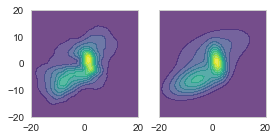

In [61]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [62]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

In [63]:
%%time
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

Wall time: 14.5 s


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


Wall time: 11.9 s


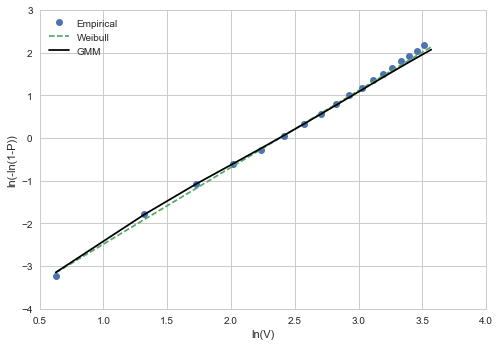

In [64]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Speed Distribution Comparison


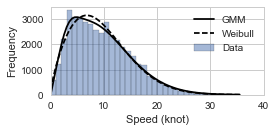

In [65]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

Direction Distribution Comparison


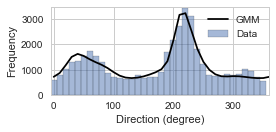

In [66]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [67]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.878496604239
Wall time: 12.1 s


## 6.3 Sectoral Comaprison

In [68]:
# %%time
# curve_collection = [direction_compare2(gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre)]

In [69]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [70]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

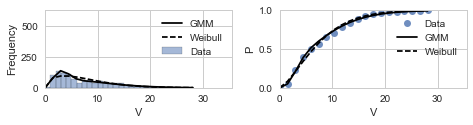

5.0 (-5.0 - 15.0) degree
data size: 1072 weight 0.02518441948973359
GMM Weibull
R square 0.9417230962 0.816007125859
max diff: 0.0372547014654 0.0494522978317 speed value: 7.39938887001 4.43963332201 y gmm 0.603486044749
 


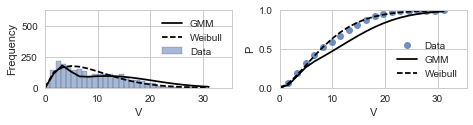

25.0 (15.0 - 35.0) degree
data size: 2315 weight 0.054386129774937744
GMM Weibull
R square 0.835137263128 0.882977084873
max diff: 0.149848303338 0.0422643252316 speed value: 16.3861373902 11.4702961732 y gmm 0.728769407245
 


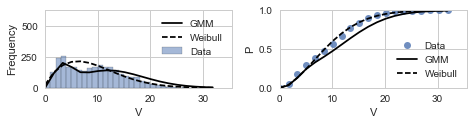

45.0 (35.0 - 55.0) degree
data size: 2862 weight 0.06723676173471785
GMM Weibull
R square 0.866414247702 0.829096361237
max diff: 0.128412556447 0.0507937499553 speed value: 13.4272690004 5.03522587515 y gmm 0.640630071086
 


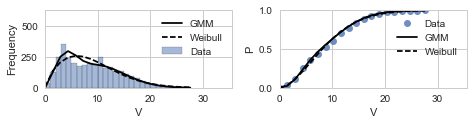

65.0 (55.0 - 75.0) degree
data size: 3280 weight 0.07705680590142368
GMM Weibull
R square 0.902072037829 0.827780432278
max diff: 0.0341391214207 0.0473130459227 speed value: 8.71790372878 4.35895186439 y gmm 0.558224487274
 


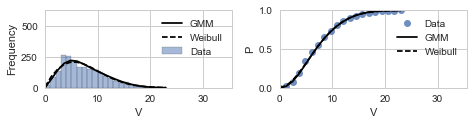

85.0 (75.0 - 95.0) degree
data size: 2141 weight 0.050298360193581734
GMM Weibull
R square 0.935153390569 0.914021053863
max diff: 0.0425385566177 0.0436817081075 speed value: 6.04600294545 6.04600294545 y gmm 0.422664619468
 


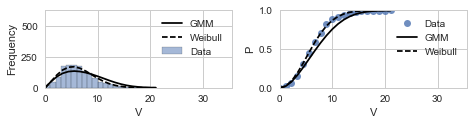

105.0 (95.0 - 115.0) degree
data size: 1374 weight 0.032279283935535405
GMM Weibull
R square 0.832520643578 0.961585559322
max diff: 0.142640587954 0.0333059262041 speed value: 8.87150760218 3.32681535082 y gmm 0.675408902585
 


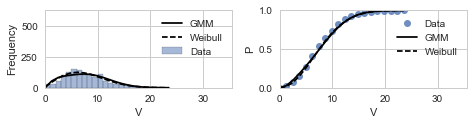

125.0 (115.0 - 135.0) degree
data size: 1280 weight 0.03007094864445802
GMM Weibull
R square 0.871930913651 0.939079367734
max diff: 0.051241485503 0.0420655617388 speed value: 8.66809530885 7.42979597901 y gmm 0.595633514497
 


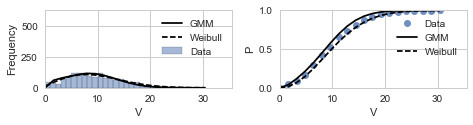

145.0 (135.0 - 155.0) degree
data size: 1456 weight 0.034205704083071
GMM Weibull
R square 0.885582061153 0.929667869536
max diff: 0.0603102029553 0.0641210325671 speed value: 14.404375839 8.00243102164 y gmm 0.872123389768
 


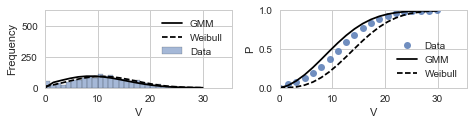

165.0 (155.0 - 175.0) degree
data size: 1379 weight 0.03239674857867782
GMM Weibull
R square 0.73202030901 0.906451865658
max diff: 0.108745419047 0.190619347031 speed value: 9.45927382245 12.6123650966 y gmm 0.475677978873
 


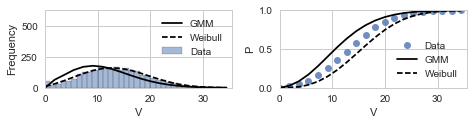

185.0 (175.0 - 195.0) degree
data size: 2626 weight 0.0616924305783959
GMM Weibull
R square 0.655170726775 0.966524183425
max diff: 0.167709083421 0.141713246308 speed value: 12.7101090238 14.5258388843 y gmm 0.635340461943
 


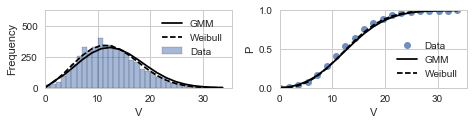

205.0 (195.0 - 215.0) degree
data size: 4931 weight 0.11584363106704881
GMM Weibull
R square 0.945224905527 0.980780187094
max diff: 0.0605412673972 0.047250033755 speed value: 15.9953351897 12.4408162587 y gmm 0.69833117227
 


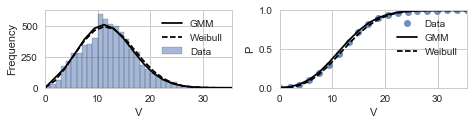

225.0 (215.0 - 235.0) degree
data size: 6575 weight 0.1544660057322746
GMM Weibull
R square 0.967842158975 0.969025561254
max diff: 0.035502285077 0.0303597519197 speed value: 9.34470156729 14.9515225077 y gmm 0.326604946674
 


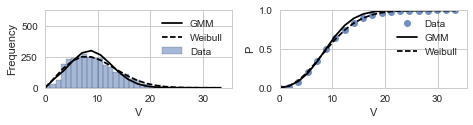

245.0 (235.0 - 255.0) degree
data size: 3036 weight 0.07132453131607386
GMM Weibull
R square 0.931516645144 0.971643855574
max diff: 0.0619808746702 0.0221876964649 speed value: 14.0658165119 3.51645412798 y gmm 0.897619873353
 


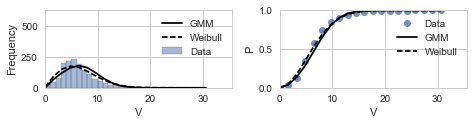

265.0 (255.0 - 275.0) degree
data size: 1533 weight 0.03601465958746417
GMM Weibull
R square 0.856592234326 0.905347660564
max diff: 0.102767342901 0.0548412787484 speed value: 6.43899631205 8.04874539006 y gmm 0.469965859969
 


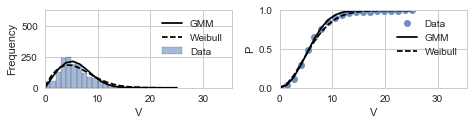

285.0 (275.0 - 295.0) degree
data size: 1578 weight 0.0370718413757459
GMM Weibull
R square 0.932122825408 0.902522018473
max diff: 0.0419692057346 0.047710878523 speed value: 10.553804388 6.5961277425 y gmm 0.942476176584
 


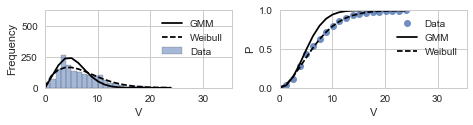

305.0 (295.0 - 315.0) degree
data size: 1625 weight 0.038176009021284596
GMM Weibull
R square 0.713022504342 0.84798683342
max diff: 0.177725192919 0.0509640696357 speed value: 8.81445943383 5.03683396219 y gmm 0.893417500611
 


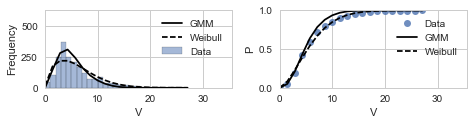

325.0 (315.0 - 335.0) degree
data size: 1956 weight 0.04595216839731241
GMM Weibull
R square 0.931926313852 0.853113061451
max diff: 0.0864574693069 0.0532071186531 speed value: 9.98379170399 7.13127978856 y gmm 0.937173215728
 


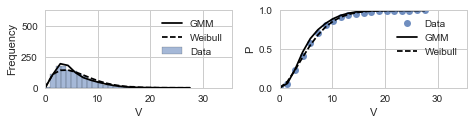

345.0 (335.0 - 355.0) degree
data size: 1265 weight 0.029718554715030775
GMM Weibull
R square 0.968321707779 0.936199548062
max diff: 0.058456080507 0.038769409699 speed value: 5.80043258758 1.45010814689 y gmm 0.635531179321
 
Wall time: 1min 7s


In [71]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.88699831604104 0.9182955555067723


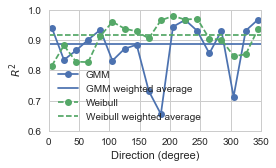

In [72]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.0797681927084336 0.0536412114412146


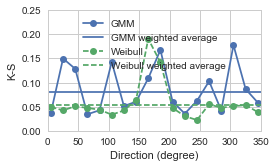

In [73]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

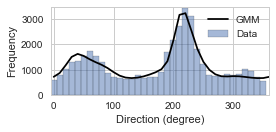

In [74]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [75]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [76]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


305.0 (295.0 - 315.0) Degree Speed Distribution
0.171689600181 8.5 0.874458830951


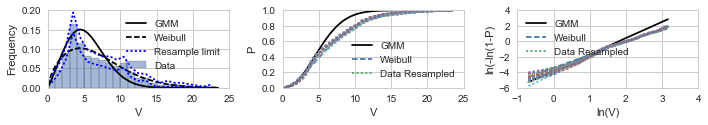

In [77]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [78]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


305.0 (295.0 - 315.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl4G9W5/7+j3ZJteXfiLYmzkkIoBBICIS0kQKFwu7Kl
TYFStocudKEF2tIFLm1JF7i0gUJKIf31tkBL2wQIXEIIWwNlhwAhzubEiW3tsvZZNL8/zBmOxjPS
aDSyJXs+z8NDvB0djaTznfc97/m+jCiKIkxMTExMTEzyYpnoCZiYmJiYmFQDpmCamJiYmJhowBRM
ExMTExMTDZiCaWJiYmJiogFTME1MTExMTDRgCqaJiYmJiYkGTME0MTExMTHRgCmYJiYmJiYmGjAF
08TExMTERAOmYJqYmJiYmGjAFEwTExMTExMNmIJpYmJiYmKiAVMwTUxMTExMNGAKpomJiYmJiQZM
wTQxMTExMdGAKZgmJiYmJuPGwYMH8fWvfx3nnXcevvSlL+Hyyy9HX18f7rjjDhxxxBEYHh6WfjcY
DOIjH/kIHn74YQwMDGD+/Pm4++67c8a78sorsWbNmnGZuymYJiYmJibjQiqVwlVXXYVLLrkEDz74
IDZs2ICvfvWr+OlPfwoAmDlzJjZv3iz9/mOPPYbp06dLX/f09OCJJ56Qvg6Hw+jv7x+3+dvG7ZFM
TExMTCqGa6+9Fg899JChY5577rlYu3at6s+ffvppnHDCCTjmmGOk7y1atAgbNmzAb3/7W5x11ll4
/PHHcfHFF0u/f8opp0i/29jYiIaGBuzZswezZ8/G5s2b8YlPfAKvvPKKoc9DDTPCNDExMTEZFwYG
BtDT0yN9fdVVV2HNmjX4xCc+gaGhIbS0tKCmpgYHDx5Ef38/pk2bBqfTmTPGJz/5STz66KMAgKee
egqrVq0at/mbEaaJiYnJFGTt2rV5o8FyMG3aNOzYsUP6+s477wQAnHfeeRAEAcCHgsjzPM455xy8
8MILOWOsWrUKX/jCF/DZz34Wra2tcLlc4zZ/M8I0MTExMRkXVq5cie3bt+ONN96Qvtff34+hoSEw
DAMAOOOMM/DUU0/hlVdewdKlS8eM4fF4MGvWLKxduxZnn332uM0dMAXTxMTExGSc8Hg8uPPOO3H/
/ffji1/8Ii644ALccMMNuP7669HR0QEAqKurw7Rp07Bw4UJYLMoSdc455+DVV1/FsmXLxnP6YERR
FMf1EU1MTExMTKoQM8I0MTExMTHRgCmYJiYmJiYmGjCrZE2mJNlsFjzPg2VZWK1WWCwWWK1WWK1W
qfjAxMTEhMYUTJMpRTabxfDwMBobG6WvRVGEKIpIJBKIxWLo6OiAxWIBwzCmkJqYmEiYgmkyJchm
sxAEAdlsFoODg2hoaEA2mwXHcbDb7ZIYEgElZ8JITRzDMJKAmkJqYjI1MQXTZFJDUq90MbgoivD7
/QiFQmAYBoIgwOFwwGKxgOd5JBIJOBwO2Gy2HDHUKqQ2m0362sTEZPJgFv2YTEoEQQDLsmBZVhI3
nuelTggsy2LWrFmYNWsWent70dbWBqfTCVEUEQ6HceDAAezZswcHDhzA0NAQwuEwEomEJL5EKIEP
hZTneWQyGSm1G4/HkUwmkUqlkMlkIAgCzFNcJlOZiy66CG+99RaA0c/g4sWLsX79eunna9aswXvv
vTfm75599lk88MADGBgYwHnnnaf58U466SRp3D179pQ4ezPCNJlkCIIgpV6JqPE8j0AggHA4jPr6
elgsFkyfPh1Wq1Uq+qmpqYEoishkMujq6pLGymQyYFkWmUwG8XhcEmCn0wmHwwGHwyH9u1BEmslk
AAAWi0WKQEla14xITaYCJ510El555RUsWrQIr776KpYvX45nnnkGX/nKV5DJZHDo0CEsWLBgzN+t
WLECwKgX7URiCqbJpEBJKDmOQyAQQCQSgdfrxezZs+FwOBCLxXJSqmpYrVa43W643e6c75PqWiKm
8XgcmUwGDMPkCCj5t3yfkxZSjuOkiJXsi9L/NoXUpJzMnDn2exdeCPzsZ/p+vn9//sc78cQTsW7d
Onz5y1/GM888g3PPPRe//OUvEYvF8M4772DJkiV4+eWX8Zvf/AZWqxXd3d346U9/ik2bNmHv3r24
4IILEAqFcOWVVyIYDOLjH/84rr76alx33XU466yzsGLFCjz77LN47LHH8POf/7y4i6EBUzBNqhol
oWRZFoFAANFoFA0NDZgzZw7sdnvBsRiG0ZQytdlssNlsOUJKRJCIaDqdxsjICFiWBcMwkojSYkrE
kU7t8jwv/ZsIKS2cgiAoirCJSTWwcOFC7N27F6Io4uWXX8a3vvUtLFu2DP/+97/x/vvvY/ny5fjh
D3+I//3f/0VzczNuu+02/OMf/4DN9qFUJZNJrF27Fm63G1/4whewcuXKcZu/KZgmVYcoijlVr7RQ
+v1+jIyMoLGxEXPnzs35oBG0CmMxMAwjCanH48mZK9nbZFkWqVQKkUhESgXTIkr+T8SRrtzNZrMA
gN27d2PmzJlSYZG82Ij+OxOTQhSKCEv9uRyLxYIFCxbg2WefRWtrKxwOB1asWIFt27Zh586d+MIX
voAf/vCHuOaaawAA6XQaJ554ImbMmCGNsWDBAtTV1QEAjjrqKOzbty/nMcpZJ2AKpknVoCaUmUwG
fr8fsVgMTU1NqkJJUBPMcgmp3W4fE+GKogiO46TCpGQyKQmpzWYbsz9KhJSMCeQKKZ1iVtsjNTGp
BE466ST8/ve/xyc/+UkAwOLFi7Fu3ToAow2ip02bhnXr1qGurg5PPfUU3G43BgcHpb/fs2cPEokE
nE4n3nrrLZx//vnYvn07/H4/AODdd98t29xNwTSpeIhQyitUM5kMfD4f4vG4JqGUM5GRGNnvdDgc
Od8nQkrvj7IsC47jYLPZkM1mEQqF4HK5pL+XR5W0kLIsKz2eXEjlRUomJuPBiSeeiB/84Ae49dZb
AQAOhwN1dXU44ogjYLFY8P3vfx+XX345RFGEx+PBrbfemiOYXq8X3/zmNxEKhXDWWWdhzpw5OPfc
c3HDDTdg06ZNmKm08WoQZrcSk4pFFEWkUilEo1E0NjZKi3s6nYbf70c8HkdzczOam5thtVo1j9vX
14fu7m64XC5JUAAgk8lgcHCwrB84vYiiCJZlceDAATQ0NEiiyvM87Hb7mNQubcagNh4wVkhtNpu5
P2piooIZYZpUHKSARhAEpNNphMNhNDU1IZVKwe/3I5lMorm5GR0dHUUJJaEcqddyQwqHGIZBU1OT
9LyJWxGJSEmhERFS+f4oEdJiIlLT1cjEZBRTME0qBloo6aMWgiCgv78fqVQKLS0t6OrqKnlPbrz2
MMuNxWKB0+mE0+nM+X42m805+kL2R4mrkfzoi1LBEBFS+pqQdK5pD2gyFTEF02TCURJKhmGQTCYx
NDQElmXR3NyM7u5uQ4pXpsLibrFY4HK54HK5cr5POyBlMhkkk0lkMhlks1nFoy9K+5xye0DyeCSt
y3EcXC5XwbSwiUm1YQqmyYShJpSJRAI+nw8sy6KxsREcx6G5udmwxx3PKtlKg7ga1dTU5HyfCKm8
2EgURcWjL/nMGPbv34+Ojg4phWwa1ptMFkzBNBl3lIQSAOLxOHw+H3ieR2trq1TcEg6HDX18Whin
gkhqQU1IC7kaycXUarXmvKZm5xeTyYQpmCbjBm1SDnyYGo3FYvD5fBAEAW1tbfB6vdLPxlPQTPEc
ix5XI/roi5aIVC21a3Z+Mak0TME0KTvEbIAskESYRkZG4Pf7kc1m0dbWhvr6+jELY7nMBLLZLGKx
GKLRqFRNqqfidipSyNWov78fNpsN6XQa0WhUk6sRPYZpWG9SqZiCaVI2aFcekqYTRRHRaFRy5Wht
bVUUSoLRgkk

### 6.4.3 Adjacent Sector Variability

In [79]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [80]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


305.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXmUHFW9/6d6m+7pmZ59n0wySSYECCORJcFgHggaDHL0
cUiEYFRARMCj4EOByCLikQdRBHksCi8qi0Z48HzwZPlhAMODHAR5kscSksyWTDLT+/T0Xl3L74/J
rVTXVHVXd1fX9MzczzkcJj3T997a7qe+2+fLiKIogoKCgoKCgiInLDO9AAoKCgoKitkASpgUFBQU
FBQ6QAmTgoKCgoJCByhhUlBQUFBQ6AAlTAoKCgoKCh2ghElBQUFBQaEDlDApKCgoKCh0gBImBQUF
BQWFDlDCpKCgoKCg0AFKmBQUFBQUFDpACZOCgoKCgkIHKGFSUFBQUFDoACVMCgoKCgoKHaCESUFB
QUFBoQOUMCkoKCgoKHSAEiYFBQUFhWk4ePAgvvOd72Djxo346le/im9+85vYt28f7rvvPhx77LHw
er3S3waDQRx//PF45plnMDo6imOOOQa//vWvs8b71re+hc2bN5uydkqYFBQUFBSmIJlM4sorr8Ql
l1yCJ598Eo8++ii+/e1v48c//jEAYNGiRXjhhRekv3/++efR0dEh/bunpwcvvfSS9O9wOIyRkRHT
1m8zbSYKCgoKiorB97//fTz11FOGjrlhwwZs3bpV8/evvvoqVq9ejZUrV0qf9ff349FHH8W//du/
Yf369XjxxRfx9a9/Xfr7M888U/rbhoYG1NfXY2BgAEuWLMELL7yAc845B++8846hx6EFamFSUFBQ
UJiC0dFR9PT0SP++8sorsXnzZpxzzjkYHx9Hc3MzXC4XDh48iJGREbS3t6OqqiprjHPPPRd//vOf
AQA7duzA2Wefbdr6qYVJQUFBMQ+xdevWnNZgOdDe3o73339f+veDDz4IANi4cSN4ngdwlBA5jsN5
552HN954I2uMs88+GxdffDHOP/98tLS0wOl0mrZ+amFSUFBQUJiCs846C7t27cI//vEP6bORkRGM
j4+DYRgAwLp167Bjxw688847WLVq1bQx3G43ent7sXXrVnzhC18wbe0AJUwKCgoKCpPgdrvx4IMP
4ne/+x2+8pWv4MILL8SWLVtw4403orOzEwBQW1uL9vZ2HHfccbBY1CnqvPPOw9///necdtppZi4f
jCiKoqkzUlBQUFBQzEJQC5OCgoKCgkIHKGFSUFBQUFDoAM2SpZiXEAQBHMeBZVlYrVZYLBZYrVZY
rVYp+YCCgoJCDkqYFPMKgiDA6/WioaFB+rcoihBFEfF4HNFoFJ2dnbBYLGAYhhIpBQWFBEqYFPMC
giCA53kIgoCxsTHU19dDEARkMhnY7XaJDAmBkpowkhPHMIxEoJRIKSjmJyhhUsxpENerPBlcFEX4
/X6EQiEwDAOe5+FwOGCxWMBxHOLxOBwOB2w2WxYZ6iVSm80m/ZuCgmLugCb9UMxJ8DwPlmXBsqxE
bhzHSZ0QWJZFb28vent7sXjxYrS2tqKqqgqiKCIcDuPAgQMYGBjAgQMHMD4+jnA4jHg8LpEvIUrg
KJFyHId0Oi25dmOxGBKJBJLJJNLpNHieB63iopjP+NrXvobdu3cDmHoGTzrpJDzyyCPS7zdv3oyP
Pvpo2vd27tyJP/7xjxgdHcXGjRt1z7dmzRpp3IGBgRJXTy1MijkGnucl1yshNY7jEAgEEA6H4fF4
YLFY0NHRAavVKiX9uFwuiKKIdDqN7u5uaax0Og2WZZFOpxGLxSQCrqqqgsPhgMPhkH7OZ5Gm02lw
HIdwOIyOjg4wDCO5dalFSjEfsGbNGrzzzjvo7+/H3//+d5x++un461//im984xtIp9M4dOgQli9f
Pu17a9euBTClRTuToIRJMSegRpSZTAaBQAATExOoq6vDkiVL4HA4EI1Gs1yqWrBaraiurkZ1dXXW
5yS7lpBpLBZDOp0GwzBZBEp+lsc5SXIRIdJMJiNZrCQuKv+ZEilFObFo0fTPLroIuOOO4n4/PJx7
vk996lN44IEHcOmll+Kvf/0rNmzYgJ/97GeIRqP44IMPcOqpp+Ltt9/GL37xC1itVixYsAA//vGP
8dxzz2FwcBAXXnghQqEQvvWtbyEYDOKMM87A1VdfjRtuuAHr16/H2rVrsXPnTjz//PP413/918JO
hg5QwqSY1VAjSpZlEQgEEIlEUF9fj6VLl8Jut+cdi2EYXS5Tm80Gm82WRaTEmiQkmkqlMDk5CZZl
wTCMRKJWq1VKQCLkKCdTjuOknwmRyomTEinFbMZxxx2HwcFBiKKIt99+G9/73vdw2mmn4c0338TH
H3+M008/HTfffDN+//vfo6mpCffccw/+8z//EzbbUapKJBLYunUrqqurcfHFF+Oss84ybf2UMClm
HURRzMp6lROl3+/H5OQkGhoa0NfXl/WgEeglxkLAMIxEpG63O2utJLbJsiySySQEQcDg4CCsVmuW
RUr+T8hQnrkrCII0HpnPYrFMSzaSf4+CIh/yWYSl/l4Ji8WC5cuXY+fOnWhpaYHD4cDatWvx2muv
Yc+ePbj44otx880345prrgEApFIpfOpTn8LChQulMZYvX47a2loAwAknnIChoaGsOcqZJ0AJk2LW
QIso0+k0/H4/otEoGhsbNYmSQIswy0WkdrtdsnBZlsWhQ4ewaNEiZDIZKTEpkUhgYmICLMvCZrNN
i4/KiZQgF5HG43G4XC44nU7JIqWgqASsWbMGv/rVr3DuuecCAE466SQ88MADAKYaRLe3t+OBBx5A
bW0tduzYgerqaoyNjUnfHxgYQDweR1VVFXbv3o0vf/nL2LVrF/x+PwDgww8/LNvaKWFSVDwIUYZC
IUxMTKCnp0ciSp/Ph1gsposolZgJS4yQMol3OhyOrN+LoohMJpMVH2VZFplMBjabbZo16nA4plmV
giAgGAyioaFB0yK1Wq3TkpQoKMzApz71Kdx000246667AAAOhwO1tbU49thjYbFY8MMf/hDf/OY3
IYoi3G437rrrrizCrKurw7XXXotQKIT169dj6dKl2LBhA7Zs2YLnnnsOi9QCrwaBdiuhqFiQuCAp
x4jFYggGg2hvb4ff70csFkNTUxOamppgtVp1j7tv3z4sWLAATqcTLMtKn6fTaYyNjZX1gctkMjh4
8CAWL15c0PdEUZSsUXnmLsdxsNvt01y7Xq8XjY2NWe5h5XjAdCK12WxUjIGCQgPUwqSoOCiJUh6j
TCaTGB4eRlNTEzo7OwsiSoJyuF7LDZI4VFVVJcVvAEhqRYRESaJRJpOB1+uFy+XKIlOiaqTl2iUv
EHIipapGFBRToIRJUTHQIspEIgG/349EIgGLxYK+vr6SY3JmxTDLDYvFIhGpHAcPHkRNTQ0sFgtY
lpXio0TVSFn6opYwRIhUfk6IO5f8LXEtUyKlmA+ghEkx48hFlD6fD6lUCi0tLWhqaoLX6y2ZLGd6
czeLlB0OxzSXrFwBKZ1OI5FIIJ1OQxAE1fioWpyT1JDyPI+BgQHpBYbq7FLMdVDCpJgxaBFlPB6H
z+cDy7JoaWlBT08PLBYLksmkIWRjZpas2hxmQW0uomrkcrmyPidEqkw2EkVRtfRFaWVSwXqK+QBK
mBSmQ40oASAWi8Hn84HjOLS0tKC+vj5rYzWK0OTjzEY3bDmgRaS5VI3sdjtEUcTExISqqhGgX7Ce
EinFbAAlTArTIBcpB45aQNFoFD6fDzzPo7W1FXV1dZobZznJjZLndORSNUomkxgfH9dUNVKzSJVj
kJ8J1MQYqKoRRaWAEiZF2cHzPMLhMGpqagAcJabJyUn4/X4IgoDW1lZ4PJ6cG2M5LEyKwkHKT6qr
q8EwDNrb2wE

# 7. Result Variability & Cross-Validation

In [81]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.9 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.585  -1.418   1.180  9.978  8.188   0.511
2  0.231  -6.888  -6.761  4.808  3.308   0.443
3  0.184   1.860   0.462  1.943  3.972  -0.267

GMM Plot Result
0.585163406754 [[-1.41806072  1.17965161]] [  6.20164704  11.31957755] -55.6294398631
0.230561715358 [[-6.88820418 -6.76098722]] [ 2.77769475  5.13319978] -65.3989139415
0.184274877887 [[ 1.8596933   0.46162875]] [ 1.85209209  4.01552466] -170.525334116


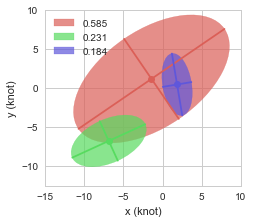

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.031      0.092  2.473336e-08      0.030       0.270

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.968  0.030      0.076  2.453149e-08      0.030       0.269

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.585  -1.560   0.968  9.920  8.392   0.522
2  0.234  -6.797  -6.659  4.991  3.413   0.488
3  0.181   1.791   0.565  1.971  3.970  -0.322

GMM Plot Result
0.585174233802 [[-1.56029188  0.96772572]] [  6.2243625   11.40538788] -53.9207443408
0.234284926357 [[-6.79651905 -6.65884793]] [ 2.76498737  5.37704467] -64.2886930891
0.180540839842 [[ 1.79125137  0.56494502]] [ 1.83667269  4.03380303] -168.498538805


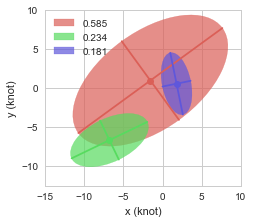

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.970  0.030      0.077  2.369266e-08      0.030       0.264

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.030      0.075  2.421870e-08      0.030       0.267

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.525  -5.598  -5.881  7.114  4.262   0.456
2  0.325   1.677   6.434  9.159  4.686   0.393
3  0.150   1.698   0.865  1.857  3.351  -0.316

GMM Plot Result
0.525201764927 [[-5.59812519 -5.88137337]] [ 3.61678577  7.46247771] -69.792280996
0.325243240261 [[ 1.67670991  6.4343577 ]] [ 4.20351816  9.38999668] -75.7233251022
0.149554994812 [[ 1.69820629  0.8649305 ]] [ 1.7258771   3.42082849] -166.581629562


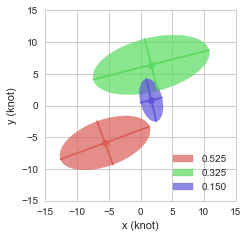

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.966  0.019      9.172  2.593011e-08      0.031       0.276

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.967  0.019      7.412  2.534987e-08      0.030       0.273

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.460  -5.519  -6.139   6.921  4.064   0.503
2  0.387   0.335   5.234  10.063  5.748   0.486
3  0.153   1.693   1.033   1.820  3.478  -0.287

GMM Plot Result
0.460237752981 [[-5.51895809 -6.13854556]] [ 3.32842931  7.30382645] -68.9782729462
0.387149272207 [[ 0.33521689  5.2335122 ]] [  4.78902561  10.55267387] -70.2456120319
0.152612974811 [[ 1.69258966  1.03331289]] [ 1.71830131  3.52914686] -168.766742093


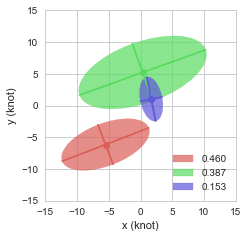

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.028     16.926  2.397901e-08      0.030       0.266

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.968  0.032     13.219  2.525303e-08      0.030       0.273

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.502  -5.597  -5.985  7.043  4.133   0.486
2  0.350   0.974   5.882  9.588  5.175   0.433
3  0.147   1.657   0.980  1.932  3.388  -0.336

GMM Plot Result
0.50211257733 [[-5.59722849 -5.98488966]] [ 3.43450127  7.40826709] -69.502247755
0.350433220611 [[ 0.97404609  5.88241604]] [ 4.50837742  9.91894984] -73.2846768149
0.147454202059 [[ 1.65661611  0.98019225]] [ 1.77542144  3.47294519] -165.21520335


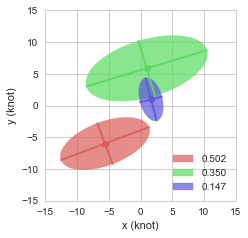

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.966  0.024     27.845  2.645020e-08      0.031       0.279

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.967  0.022     25.909  2.558812e-08      0.030       0.274

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.602  -1.399   1.149  9.922  8.291   0.522
2  0.221  -6.804  -6.729  4.845  3.361   0.484
3  0.177   1.738   0.516  1.885  4.035  -0.286

GMM Plot Result
0.601513939847 [[-1.39871874  1.14937648]] [  6.17970565  11.35780183] -54.5472738111
0.221394544605 [[-6.80374375 -6.72930022]] [ 2.72450136  5.22967916] -63.8289135397
0.177091515547 [[ 1.73797089  0.51608362]] [ 1.78640389  4.07958588] -170.562903823


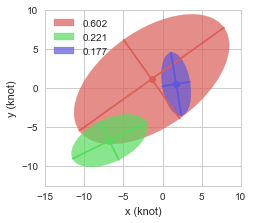

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.967  0.032      0.094  2.565516e-08      0.030       0.275

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.034      0.078  2.436724e-08      0.030       0.268

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.599  -1.629   0.963  10.007  8.268   0.513
2  0.224  -6.714  -6.696   4.827  3.364   0.474
3  0.177   1.813   0.583   1.894  3.990  -0.280

GMM Plot Result
0.599019415529 [[-1.62921129  0.96281065]] [  6.24093662  11.38191506] -55.2652819611
0.223536533348 [[-6.71446387 -6.696496  ]] [ 2.7487934   5.20213858] -63.9521193683
0.177444051123 [[ 1.81345025  0.58314491]] [ 1.79826164  4.03386292] -170.531754806


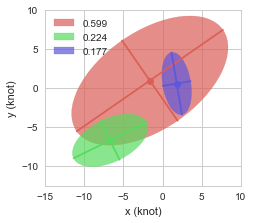

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.968  0.031      0.079  2.461048e-08      0.030       0.269

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.032      0.072  2.430170e-08      0.030       0.267

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.486  -5.696  -6.005  6.912  4.058   0.464
2  0.363   1.056   5.903  9.511  5.213   0.429
3  0.150   1.740   0.670  1.843  3.375  -0.308

GMM Plot Result
0.486436866597 [[-5.69575499 -6.00484349]] [ 3.42843482  7.24511075] -70.1178793519
0.363470156639 [[ 1.05608648  5.90283793]] [ 4.55013067  9.84576209] -73.0595772974
0.150092976764 [[ 1.74003372  0.67046772]] [ 1.72101715  3.43927101] -167.194131288


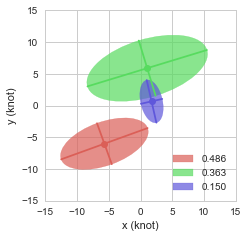

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.965  0.026    111.935  2.752014e-08      0.032       0.285

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.967  0.026     23.283  2.533350e-08      0.030       0.273

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.595  -1.753   0.965  10.053  8.342   0.522
2  0.229  -6.551  -6.628   5.041  3.289   0.493
3  0.176   1.767   0.706   1.955  3.950  -0.311

GMM Plot Result
0.594731687187 [[-1.753188    0.96538272]] [  6.23070851  11.48200786] -54.8910489296
0.229266442613 [[-6.55081555 -6.62826826]] [ 2.67558167  5.39213173] -65.8787585292
0.1760018702 [[ 1.76734154  0.70627939]] [ 1.830651    4.00967804] -168.901486486


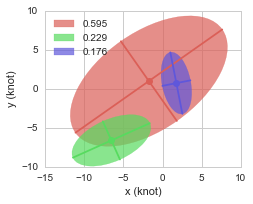

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.968  0.033      0.080  2.458999e-08      0.031       0.269

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.032      0.075  2.421328e-08      0.030       0.267

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.605  -1.805   0.865  10.077  8.421   0.518
2  0.217  -6.691  -6.593   4.784  3.250   0.475
3  0.178   1.719   0.496   1.899  3.938  -0.285

GMM Plot Result
0.604751246786 [[-1.80450442  0.86523419]] [  6.29754268  11.52357525] -54.6004363685
0.217311933477 [[-6.69060179 -6.59299014]] [ 2.66517821  5.13310411] -64.9023520415
0.177936819737 [[ 1.71912981  0.49582435]] [ 1.79931255  3.9845818 ] -170.160779102


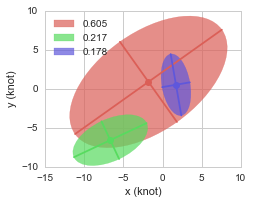

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.033      0.079  2.418382e-08      0.030       0.267

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.035      0.071  2.431250e-08      0.030       0.267


Wall time: 28.6 s


In [82]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [83]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 31924.5 10641.5
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.220193  0.054376  1.615731e-07    0.075501     0.689554  0.792643
1    0.222988  0.054540  1.650956e-07    0.076261     0.697026  0.788672
2    0.211814  0.053152  1.599284e-07    0.076360     0.685812  0.793407
3    0.204355  0.052532  1.598454e-07    0.077318     0.685043  0.794575

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.266453  0.050152  1.637414e-07    0.078773     0.693111  0.789317
1    0.224193  0.058495  1.599882e-07    0.077363     0.685134  0.793201
2    0.246293  0.053174  1.695073e-07    0.076391     0.705899  0.786460
3    0.333741  0.054031  1.678932e-07    0.072079     0.704352  0.785445

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0   11.922945  0.085697  8.384173e-08    0.054793     0.496527  0.892941
1   11.061147  0.083250  7.917688e-08    0.055023     0.482444  0.897656
2   13.901471  0.085702  8.108659e-08    0.053628     0.488336  0.895889
3   14.101607  0.084515  8.084961e-08    0.053614     0.487652  0.895958

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0   37.189864  0.086770  7.788725e-08    0.052219     0.478598  0.898474
1   28.525482  0.084688  9.205288e-08    0.053713     0.520537  0.884322
2   11.084443  0.083155  8.559686e-08    0.057087     0.501617  0.890190
3   12.900703  0.084813  8.642523e-08    0.057343     0.503944  0.889897

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0   21.052099  0.027633  2.554168e-08    0.030374     0.274237  0.966949
1   12.780493  0.026865  2.498052e-08    0.030049     0.270931  0.967923
2   22.370024  0.026824  2.483870e-08    0.029710     0.270221  0.968163
3   35.447570  0.025455  2.573632e-08    0.030676     0.275064  0.967041

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0   27.181468  0.033040  2.865243e-08    0.031841     0.289703  0.964082
1  106.969299  0.027290  3.052958e-08    0.033071     0.299958  0.960859
2   15.654893  0.026156  3.003471e-08    0.032542     0.297318  0.961247
3   24.474821  0.020914  2.825404e-08    0.030572     0.288359  0.963483

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.216160  0.022828  1.935936e-08    0.026489     0.238533  0.975143
1    0.128527  0.021403  1.864202e-08    0.025422     0.234171  0.976118
2    0.238160  0.021145  1.771963e-08    0.025833     0.228260  0.977064
3    0.268282  0.020156  1.818922e-08    0.025762     0.231307  0.976701

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.211480  0.017363  2.210915e-08    0.026878     0.255183  0.971697
1    0.553419  0.028164  2.270288e-08    0.029762     0.258260  0.970690
2    0.145900  0.029834  2.495567e-08    0.028559     0.270926  0.968735
3    0.403450  0.017444  2.293345e-08    0.028313     0.259575  0.970339

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0  521.554847  0.021582  1.262261e-08    0.021172     0.192543  0.983917
1    0.054968  0.013434  1.291749e-08    0.021804     0.194962  0.983257
2    0.033521  0.016084  1.026790e-08    0.019367     0.173796  0.986760
3    0.029346  0.013920  1.017558e-08    0.019230     0.172997  0.986968

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0   17.477453  0.031076  1.943124e-08    0.027454     0.239478  0.974471
1    0.068722  0.015794  1.976130e-08    0.025858     0.240823  0.975372
2    0.045844  0.019936  1.453992e-08    0.022393     0.206660  0.981580
3    0.048222  0.017581  1.545594e-08    0.023666     0.213129  0.980032

Wall time: 1min 14s


In [84]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.214837  0.053650  1.616106e-07    0.076360     0.689359  0.792324
2   12.746792  0.084791  8.123870e-08    0.054265     0.488740  0.895611
3   22.912547  0.026694  2.527431e-08    0.030202     0.272613  0.967519
4    0.212782  0.021383  1.847756e-08    0.025876     0.233068  0.976256
5  130.418170  0.016255  1.149589e-08    0.020393     0.183575  0.985225

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.267670  0.053963  1.652825e-07    0.076152     0.697124  0.788606
2   22.425123  0.084857  8.549055e-08    0.055090     0.501174  0.890721
3   43.570120  0.026850  2.936769e-08    0.032007     0.293835  0.962418
4    0.328562  0.023201  2.317529e-08    0.028378     0.260986  0.970365
5    4.410060  0.021097  1.729710e-08    0.024843     0.225023  0.977864

R_square

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


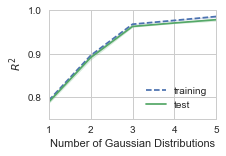

K_S


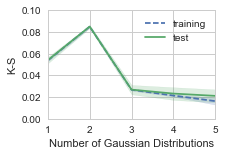

Chi_square


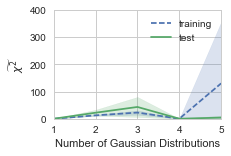

In [85]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

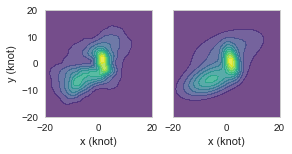

In [86]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

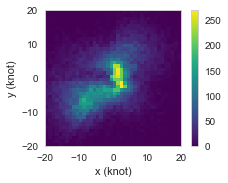

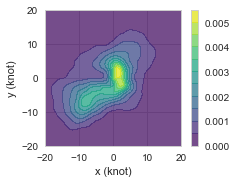

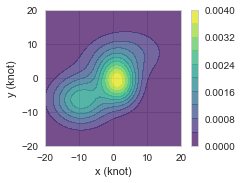

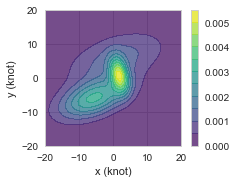

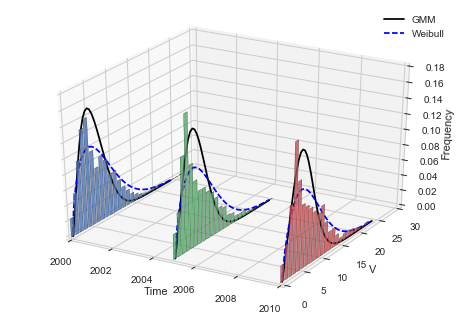

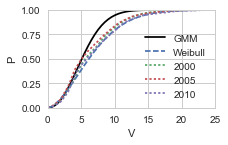

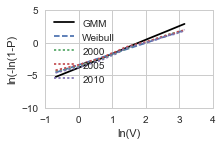

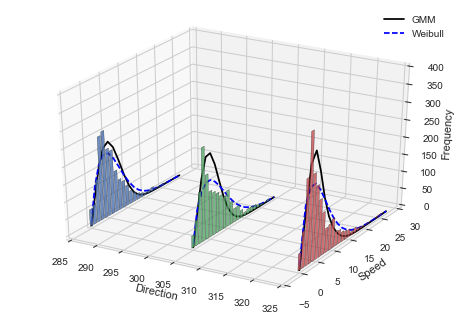

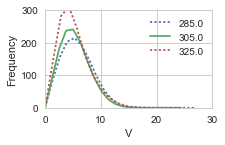

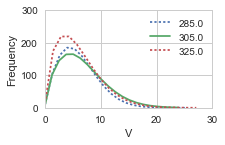

In [87]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [88]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

auckland_intl
